In [10]:
import cPickle as pickle
import h5py

def PlotSeries(start, stop, text,labels, ylim=None, mod=1, ylim_glob=None):
    plt.figure(figsize=(10,6))
    models = ['../mod_c/base_2D_XCO_stripped.hdf5'] + ['mod_h_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5')
    h_center_HR = h5py.File('../mod_c/mod_e_center_high_res.hdf5')
    
    #print 'log-like, TS:', 'center_high_res_no_dm', np.sum(h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC_no_dm/'].attrs['loglike_total']-h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total'])
    #print 'log-like, TS:', 'center_high_res', np.sum(h_center_HR['/fit_results/GC/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-h_center_HR['/fit_results/GC/'].attrs['loglike_total'])
    
    fits = []
    ll, ll_no_dm = [], []
    llg1, llg2, llg3, llg4 = [],[],[],[]

    
    for i, model in enumerate(models):
            
        try:
            h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5', 'r')
            h = h5py.File('../mod_c/'+model)
            
            
            fit = h['/fit_results/GC'].attrs
            fit_no_dm = h['/fit_results/GC_no_dm'].attrs
            #print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
            ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
            ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
            
            fit_global = h['/fit_results/global'].attrs
            llg1.append(fit_global['localfval'])
            #print fit_global['localfval'], fit_global['outerfval'], fit_global['innerfval']
            llg2.append(fit_global['outerfval'])
            llg3.append(fit_global['innerfval'])
            llg4.append(llg1[-1]+llg2[-1]+llg3[-1])
            
            #print fit.keys()
            E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']
            
            plt.subplot(221)

            if i==0:
                plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                             label=model,capthick=1, capsize=2, ls=':' )
            elif i%mod==0:
                plt.errorbar(E/1e3,(E**2*flux/1e3), 
                             label=labels[i-1],capthick=1, capsize=2, ls='-' )

            plt.subplot(222)
            
            #print h_base['/fit_results/GC/'].attrs.keys()
            if i%mod==0:
                TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
                plt.plot(E/1e3, TS)

        except:
            ll.append(-1e10)
            ll_no_dm.append(-1e10)
            llg1.append(-1e10)
            llg2.append(-1e10)
            llg3.append(-1e10)
            llg4.append(-1e10)
            print 'no results found for model ', model
    
    
    plt.subplot(223)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(221)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.ylim(5e-8,1e-6)
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-7,2e-6)
    
    plt.subplot(222)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-50,200)
            
    plt.subplot(223)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)
    
    plt.subplot(224)
    
    # ------------------------------------------------
    # Global fitting plot
    # ------------------------------------------------
    plt.plot(range(len(labels)), -2*(llg1[1:]-llg1[0]),marker='o',ls=':', markersize=4, color='firebrick', label='Local')
    plt.plot(range(len(labels)), -2*(llg2[1:]-llg2[0]),marker='o',ls=':', markersize=4,color='steelblue', label='Outer')
    plt.plot(range(len(labels)), -2*(llg3[1:]-llg3[0]),marker='o',ls=':', markersize=4,color='goldenrod', label='Inner')
    plt.plot(range(len(labels)), -2*(llg4[1:]-llg4[0]),marker='o',ls=':', markersize=4,color='cyan', label='Total')
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim_glob is not None:
        plt.ylim(ylim_glob)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)
    

def PlotModels(pathList, text,labels, ylim=None):
    plt.figure(figsize=(14,2.5))
    models = ['../base_2D.hdf5'] + pathList
    h_base = h5py.File('../base_2D.hdf5')
    
    fits = []
    ll, ll_no_dm = [], []

    
    for i, model in enumerate(models):
        #try:
        h_base = h5py.File('../base_2D.hdf5')
        h = h5py.File('../mod_c/'+model)
        #try:
        h['/fit_results/GC/'].attrs.keys()
        fit = h['/fit_results/GC'].attrs
        fit_no_dm = h['/fit_results/GC_no_dm'].attrs
        print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
        ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
        ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
        #print fit.keys()
        E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']

        plt.subplot(131)

        if i==0:
            plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                         label=model,capthick=1, capsize=2, ls=':' )
        else:
            plt.errorbar(E/1e3,(E**2*flux/1e3), 
                         label=labels[i-1],capthick=1, capsize=2, ls='-' )

        plt.subplot(132)

        #print h_base['/fit_results/GC/'].attrs.keys()
       
        TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
        plt.plot(E/1e3, TS)

#         except:
#             ll.append(-1e10)
#             ll_no_dm.append(-1e-10)
#             print 'no results found for model ', model
    
    
    plt.subplot(133)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(131)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-8,2e-6)
    
    plt.subplot(132)
    plt.ylabel(r'$-\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-200,50)
            
    plt.subplot(133)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)


#PlotModels(['../mod_c/mod_e_center_high_res.hdf5','../mod_c/mod_e_center_high_res_XCO.hdf5'], text='High-Res CR', labels=['HR','HR $X_{CO}$'])



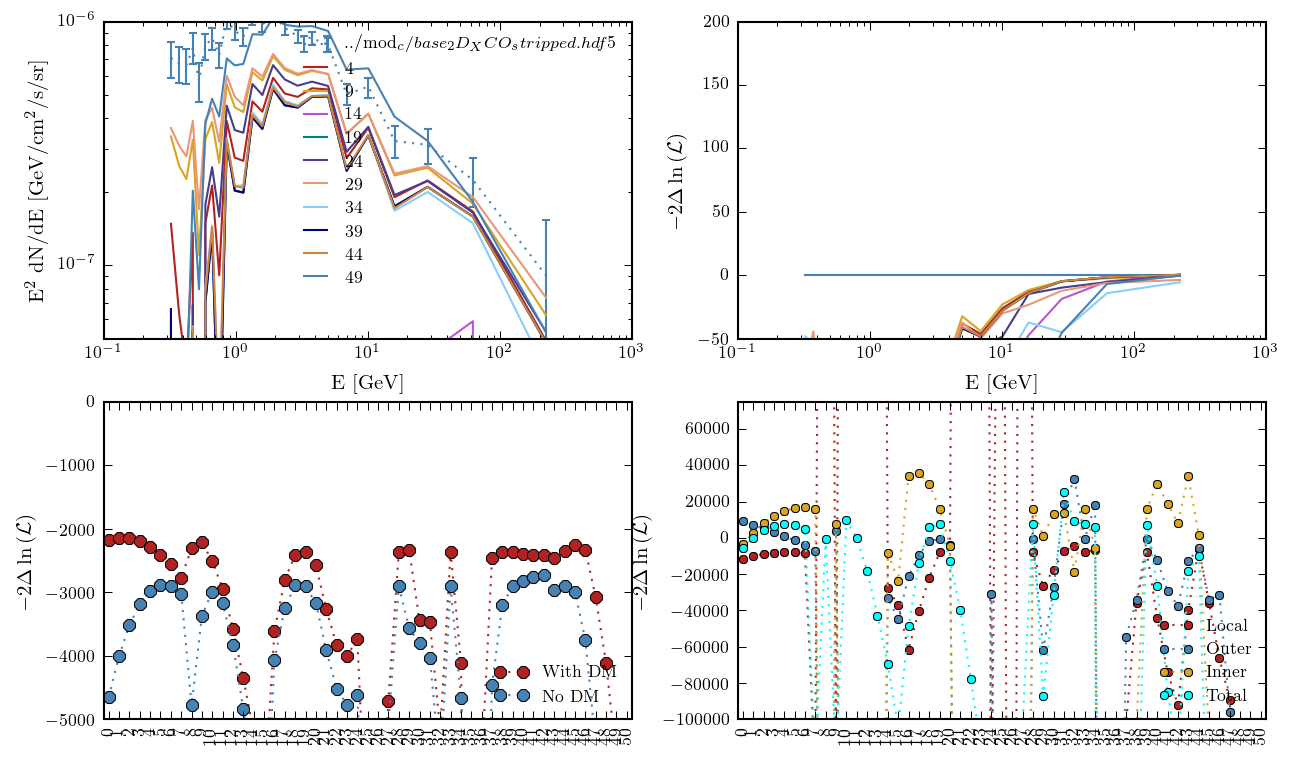

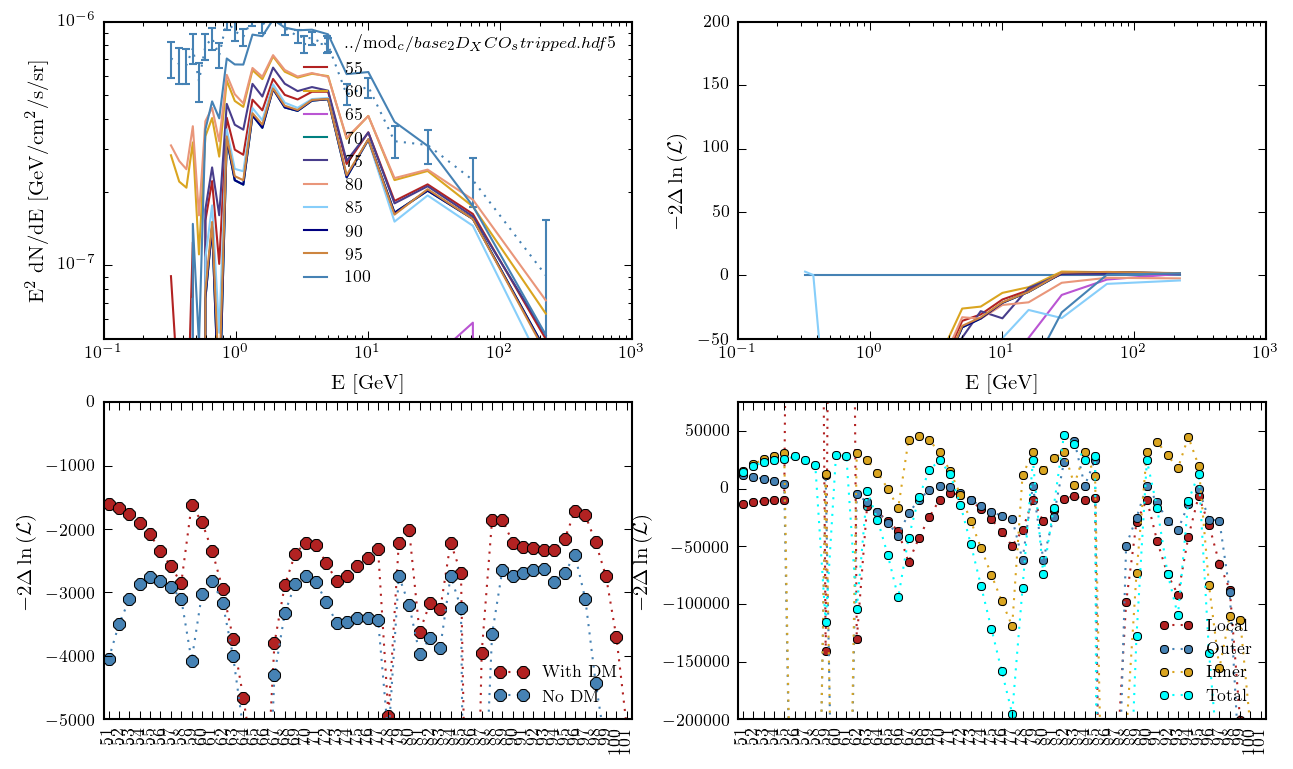

no results found for model  mod_h_149_XCO_stripped.hdf5


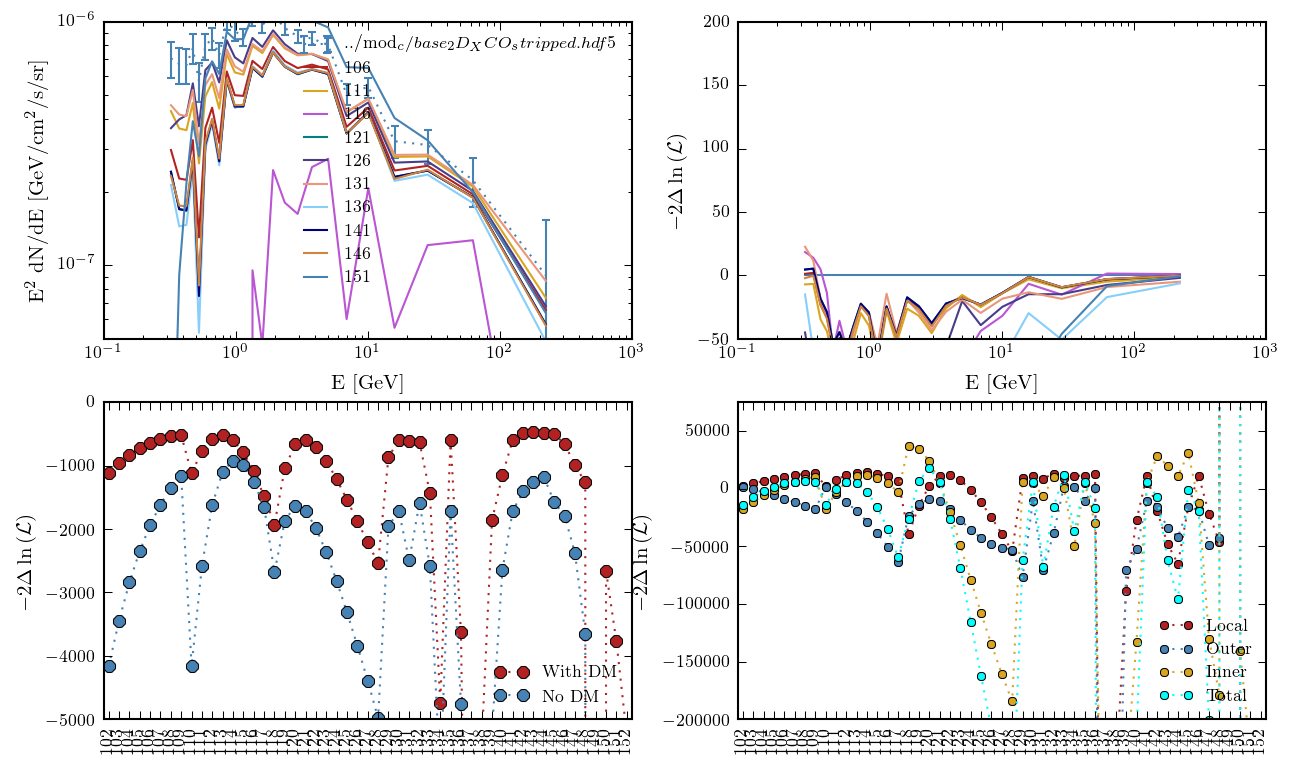

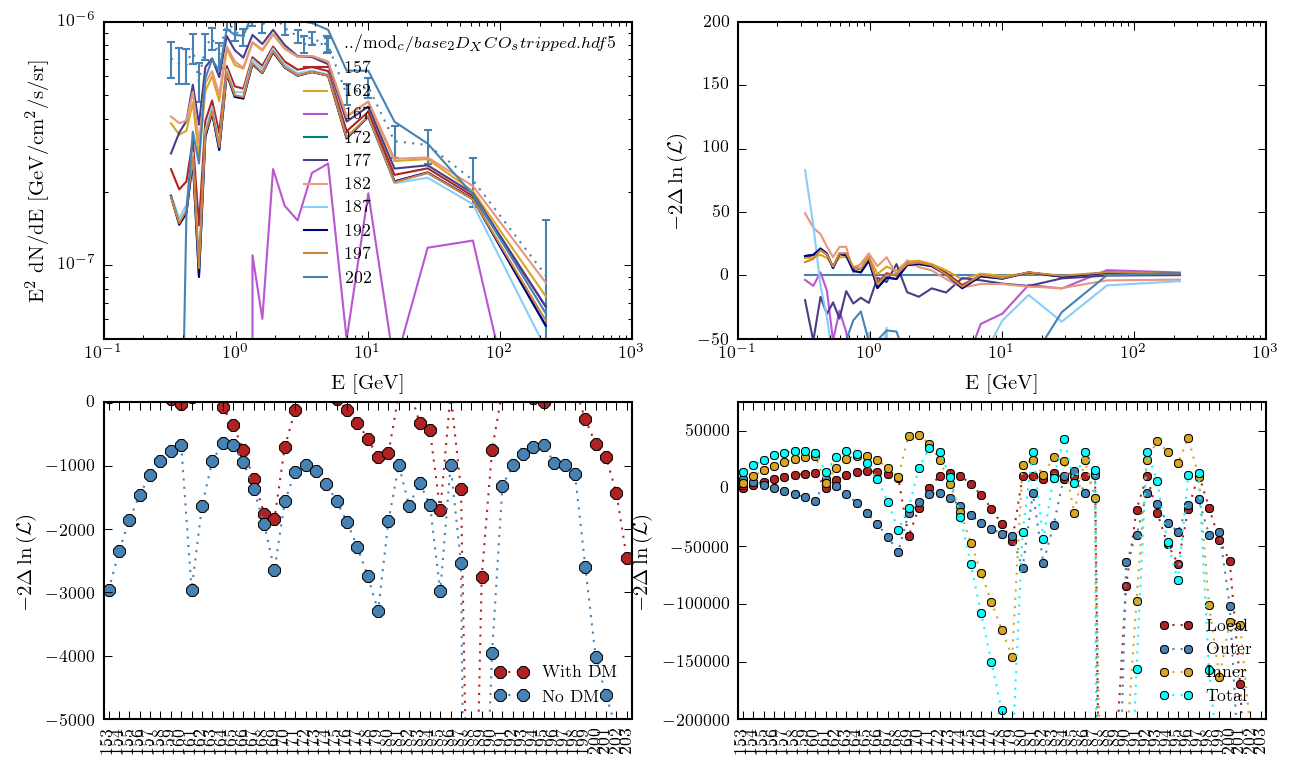

In [16]:

PlotSeries(start=0, stop=51, text='Spiral Fraction', labels=[str(i) for i in range(0,51)], mod=5, ylim=(-5e3,0), ylim_glob=(-1e5,.75e5))
plt.show()
PlotSeries(start=51, stop=102, text='Spiral Fraction', labels=[str(i) for i in range(51,102)], mod=5,ylim=(-5e3,0), ylim_glob=(-2e5,.75e5))
plt.show()
PlotSeries(start=102, stop=153, text='Spiral Fraction', labels=[str(i) for i in range(102,153)], mod=5,ylim=(-5e3,0), ylim_glob=(-2e5,.75e5))
plt.show()
PlotSeries(start=153, stop=204, text='Spiral Fraction', labels=[str(i) for i in range(153,204)], mod=5,ylim=(-5e3,0), ylim_glob=(-2e5,.75e5))

# PEB HI+H2.
##Default Model is $v_a=35$ km/s, $D_0=7.2e28$, $f_{sprl}=.2$, SNR source dist, $z_{max}=3.5$ kpc, $T_s=150$, Mag5

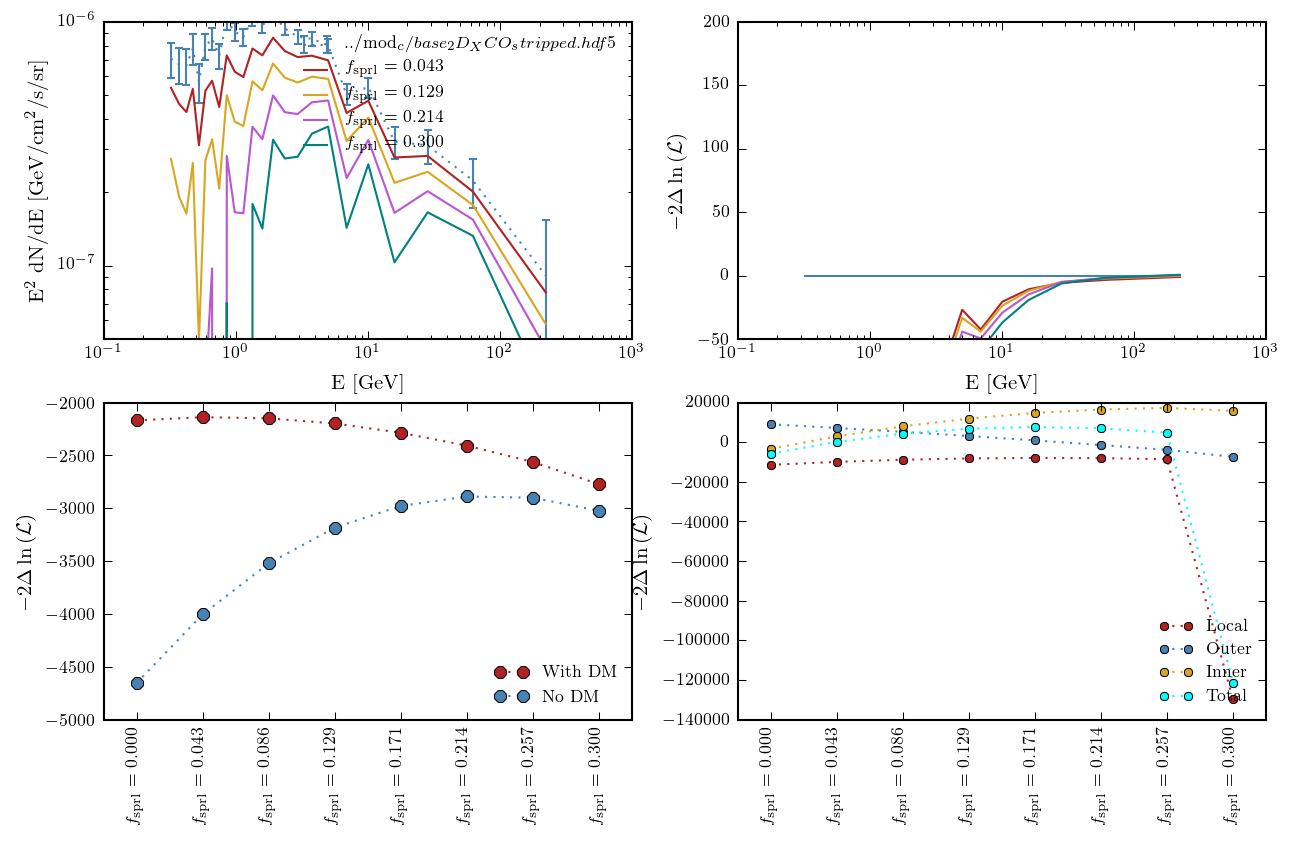

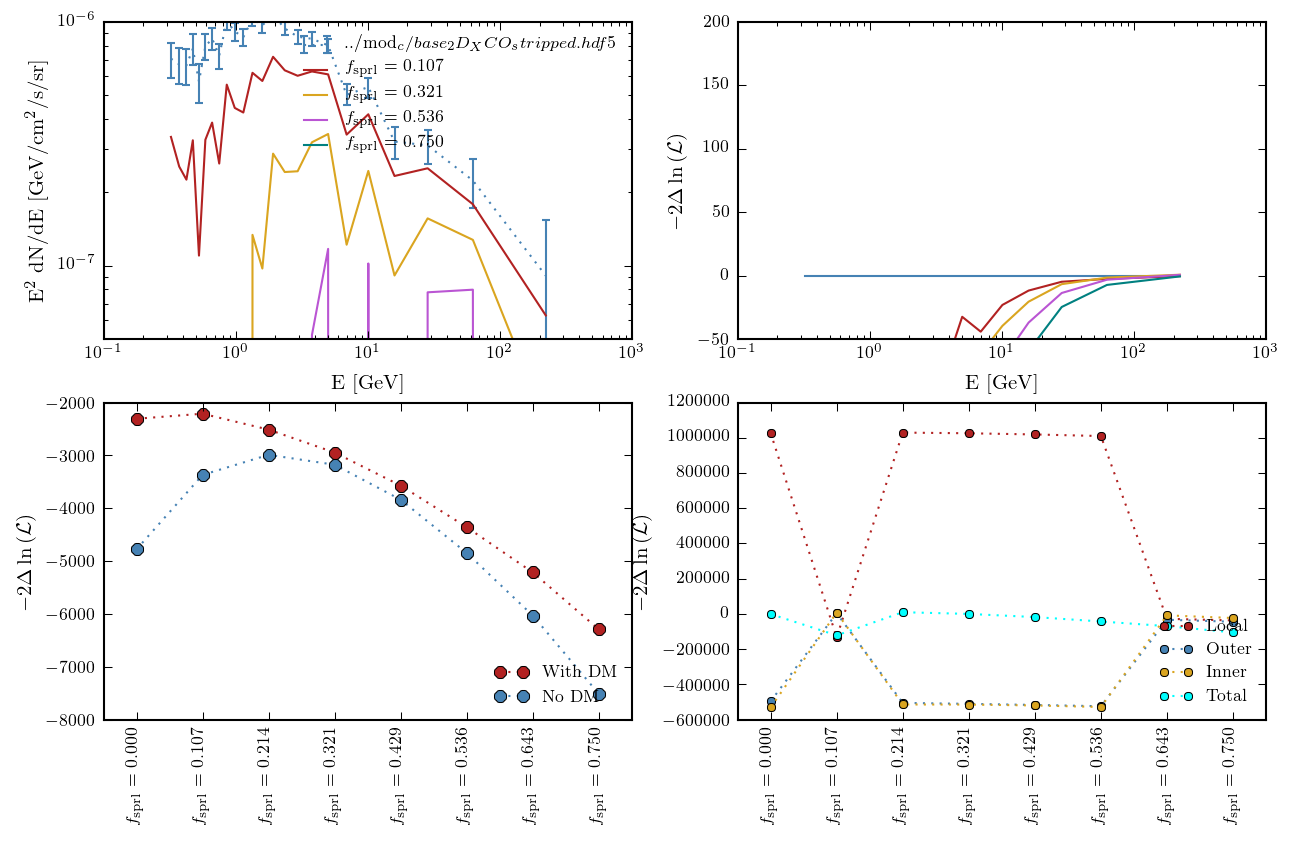

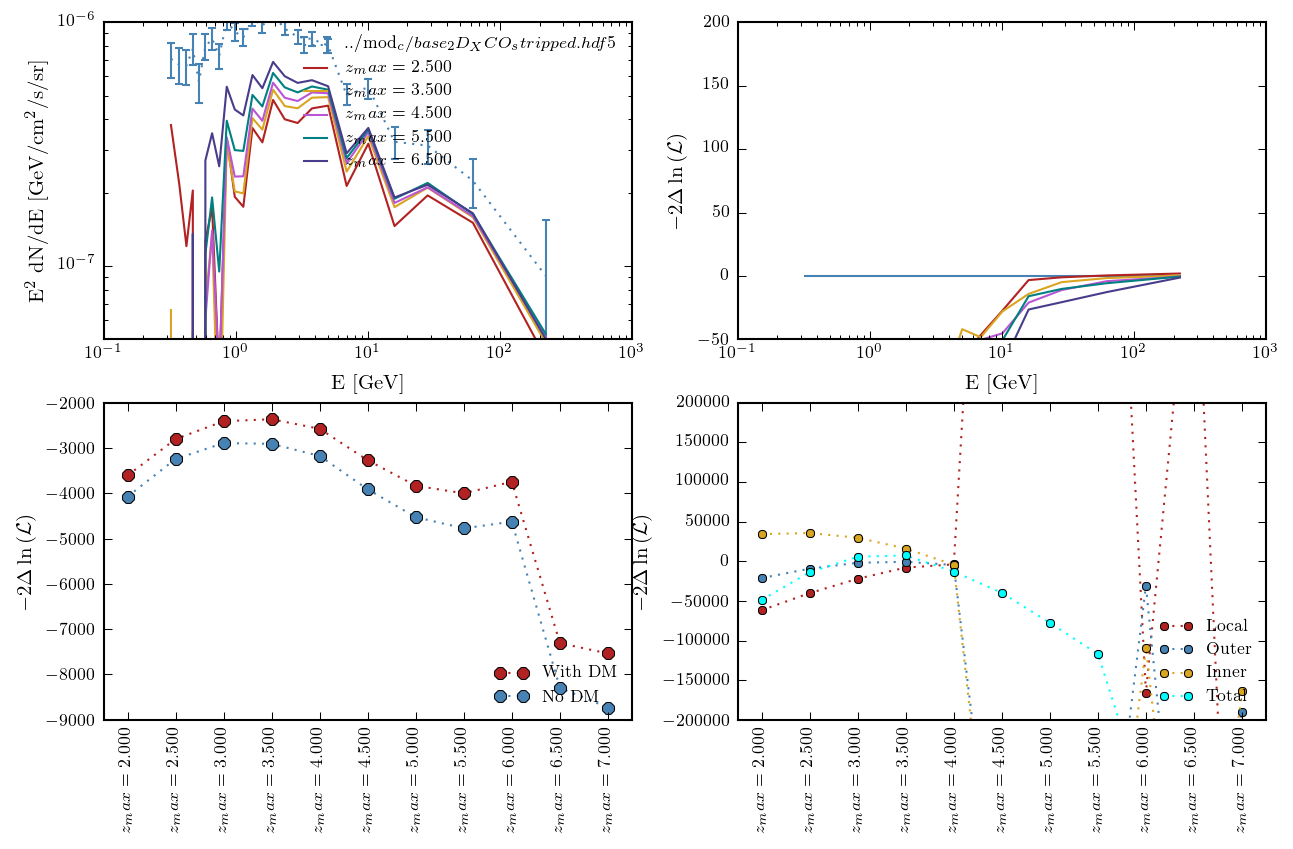

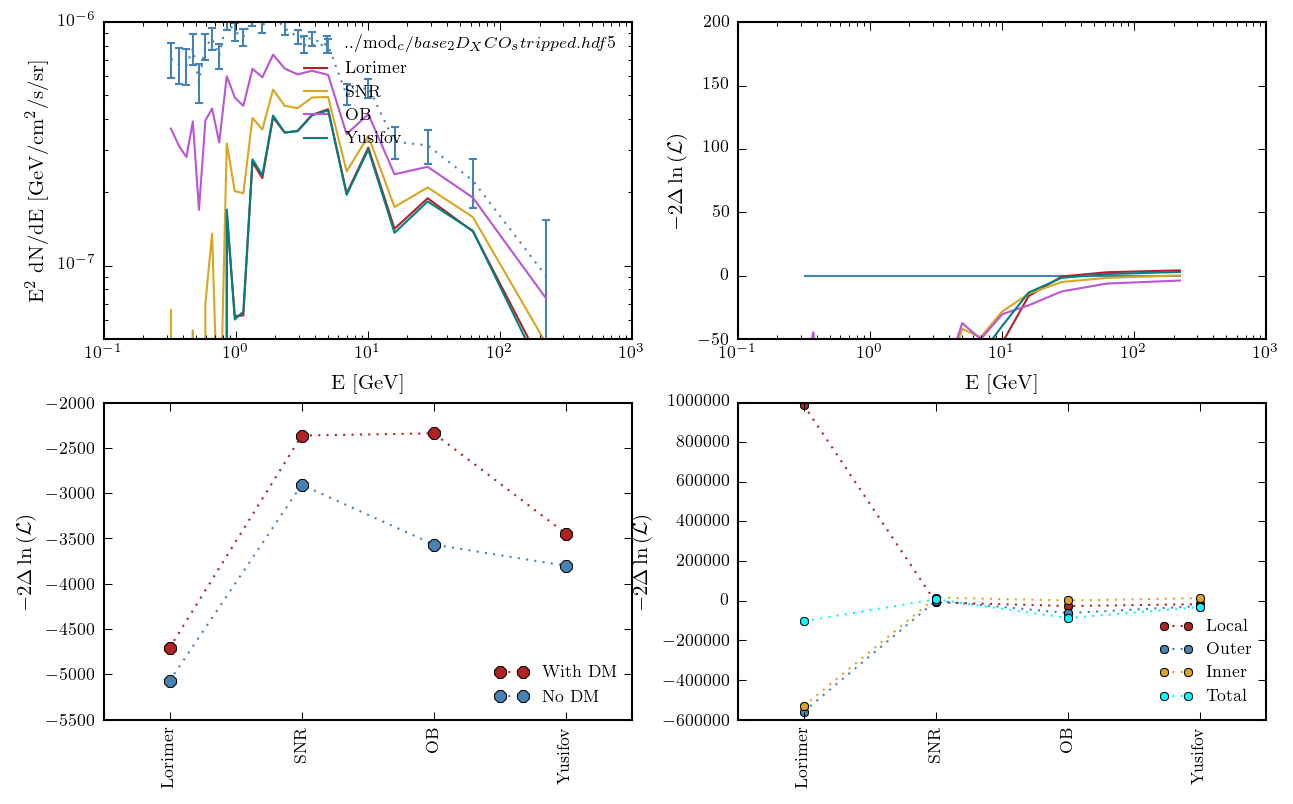

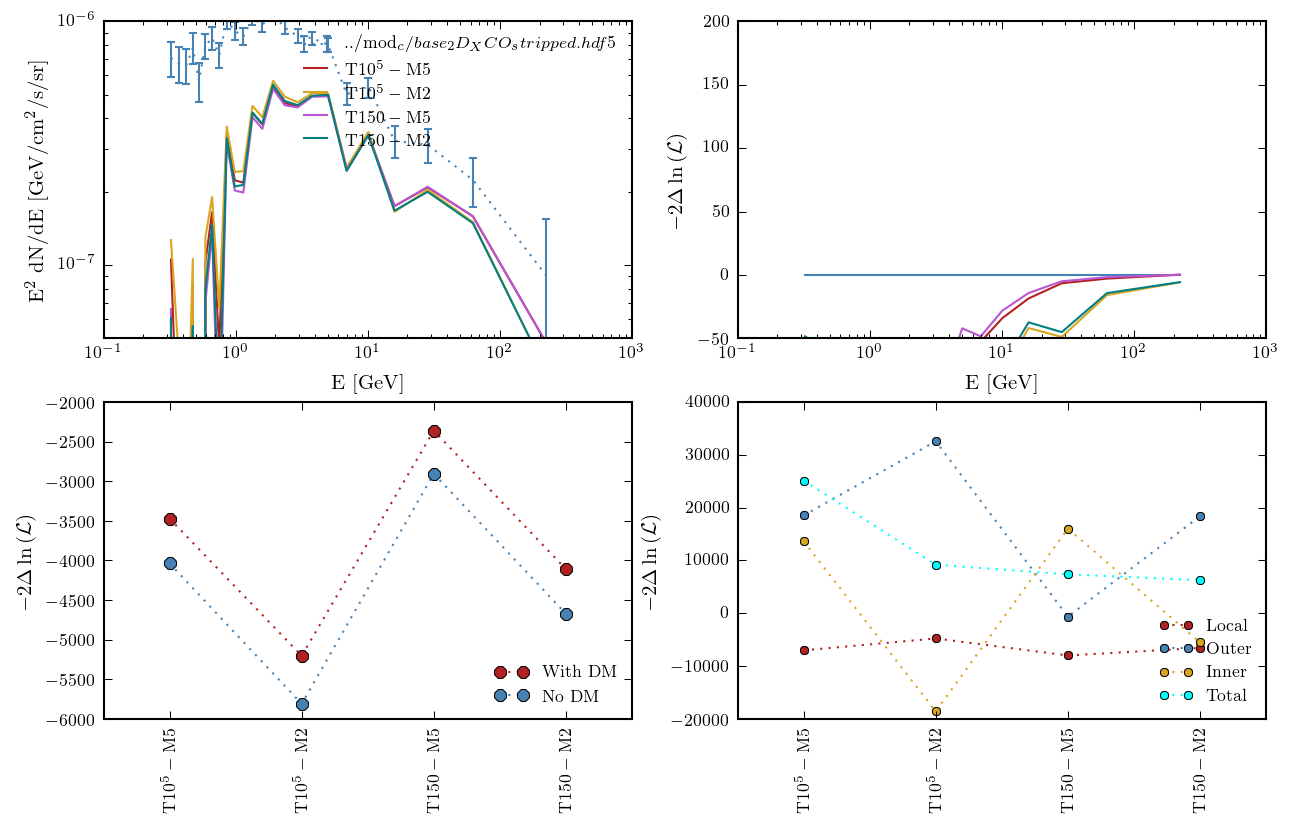

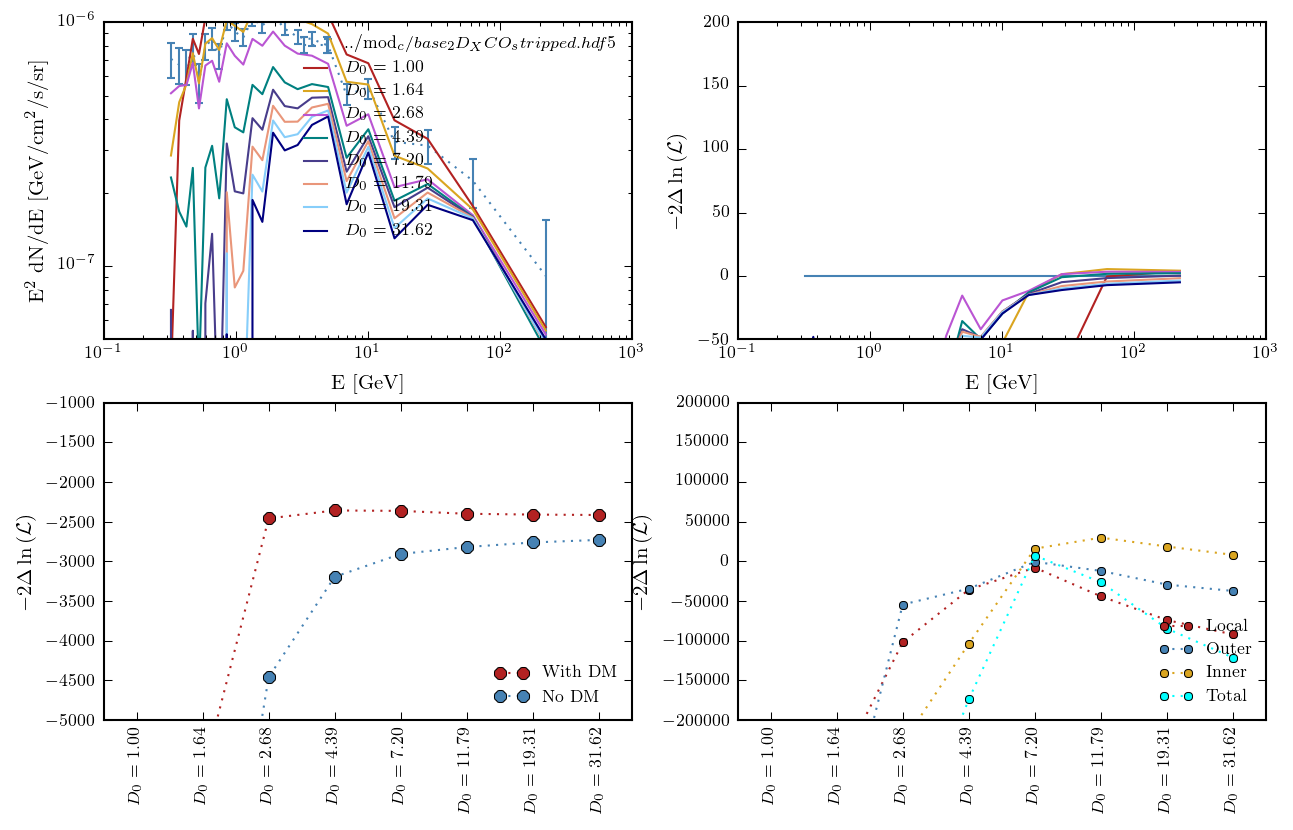

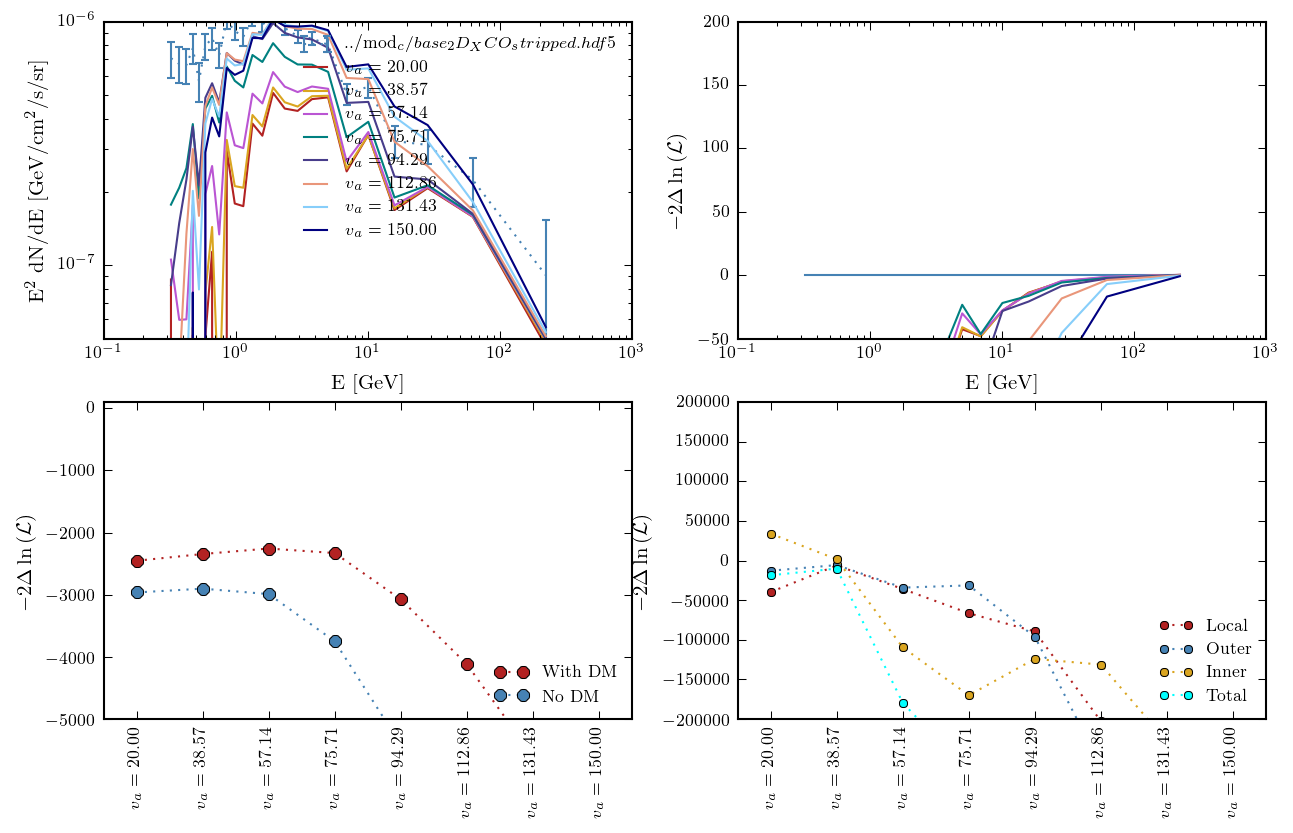

In [9]:

PlotSeries(start=0, stop=8, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.3f$'%i for i in np.linspace(0,.30,8)], mod=2)
plt.show()
PlotSeries(start=8, stop=16, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.3f$'%i for i in np.linspace(0,.75,8)], mod=2)
plt.show()
PlotSeries(start=16, stop=27, text='z_max', labels=[r'$z_max=%1.3f$'%i for i in np.linspace(2,7,11)], mod=2, ylim_glob=(-2e5,2e5))
plt.show()
PlotSeries(start=27, stop=31, text='Primary CR Sources', labels=('Lorimer','SNR','OB','Yusifov'))
plt.show()
PlotSeries(start=31, stop=35, text=r'$\rm T_S$ and Mag(B-V)', labels=(r'$\rm T10^5-M5$',r'$\rm T10^5-M2$',r'$\rm T150-M5$',r'$\rm T150-M2$'))
plt.show()
PlotSeries(start=35, stop=43, text=r'$\rm D_0\ [10^{28} cm^{3}s^{-1}]$', labels=['$D_0=%2.2f' % D + '$' for D in np.logspace(28,29.5,8)/1e28], ylim=(-5e3,-1e3), ylim_glob=(-2e5,2e5))
plt.show()
PlotSeries(start=43, stop=51, text=r'\noindent Alfven Velocity $v_A $\newline $\rm [km\ s^{-1}]$', labels=['$v_a=%2.2f' % v + '$' for v in np.linspace(20,150,8)], ylim=(-5000,100), ylim_glob=(-2e5,2e5) )


# PEB HI, galprop H2.   

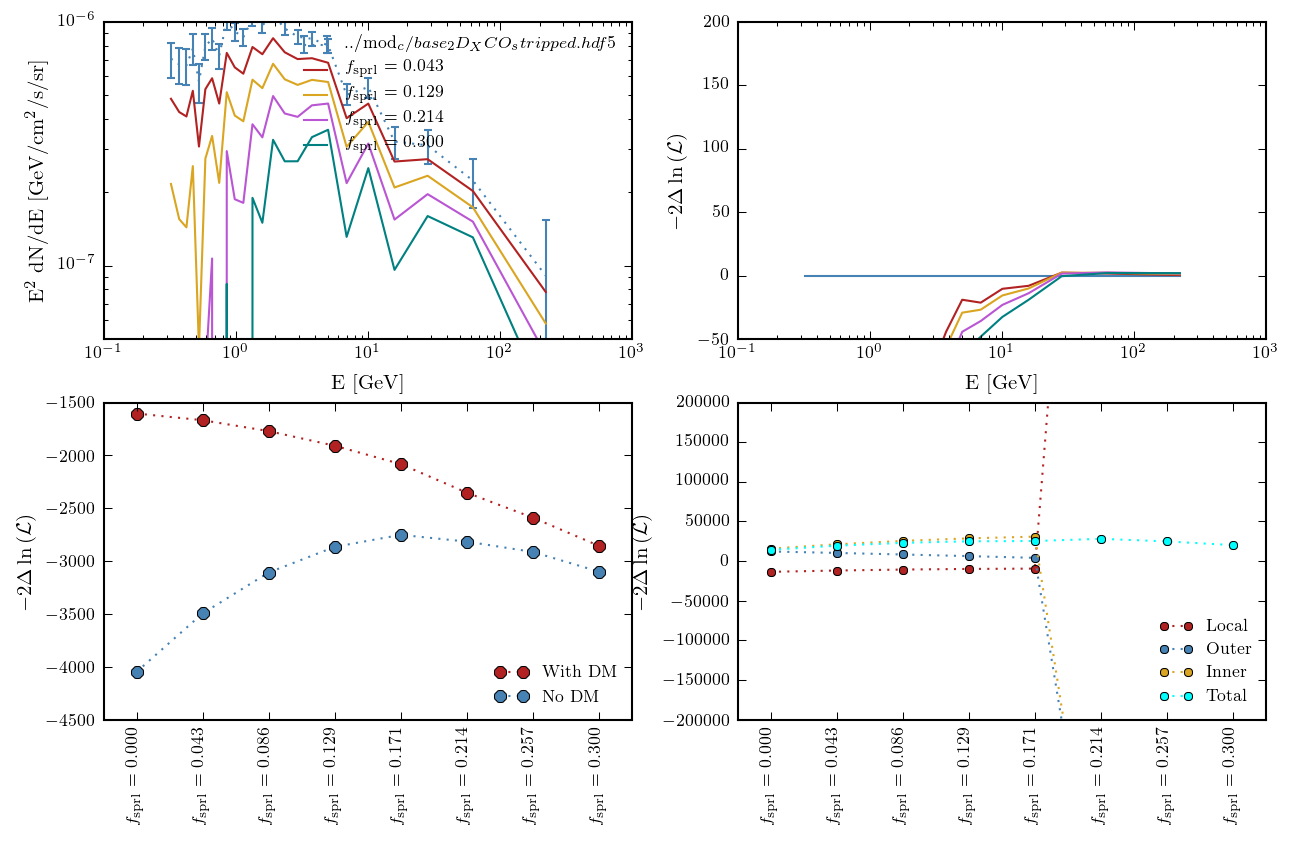

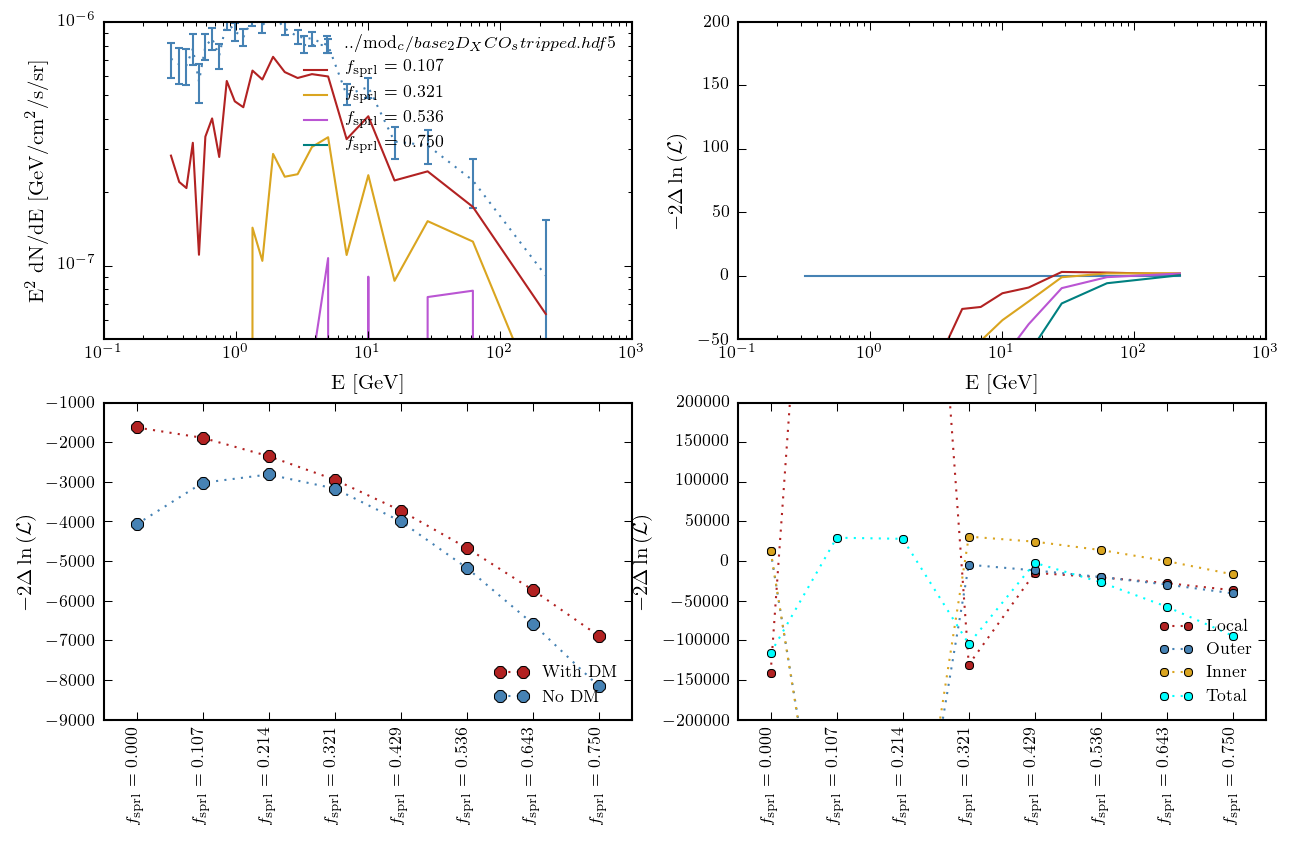

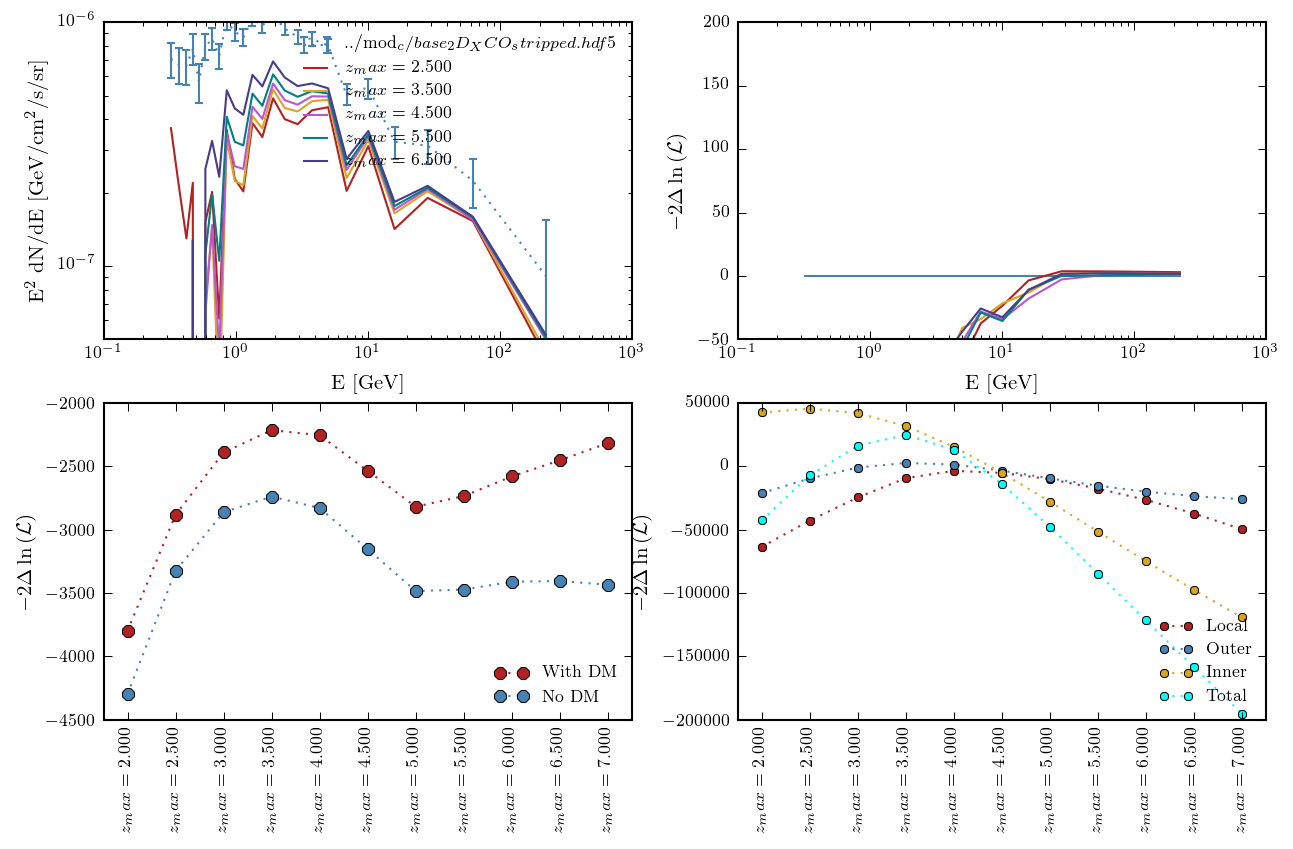

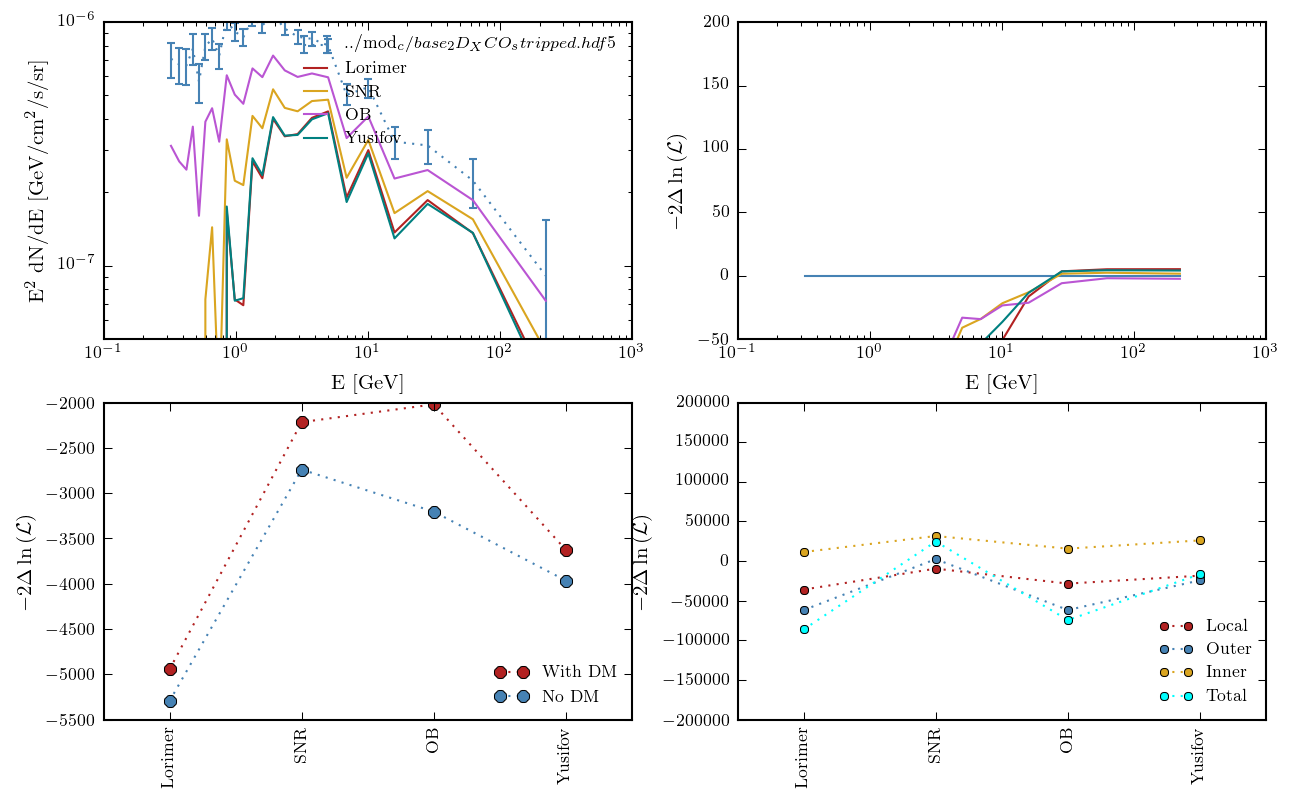

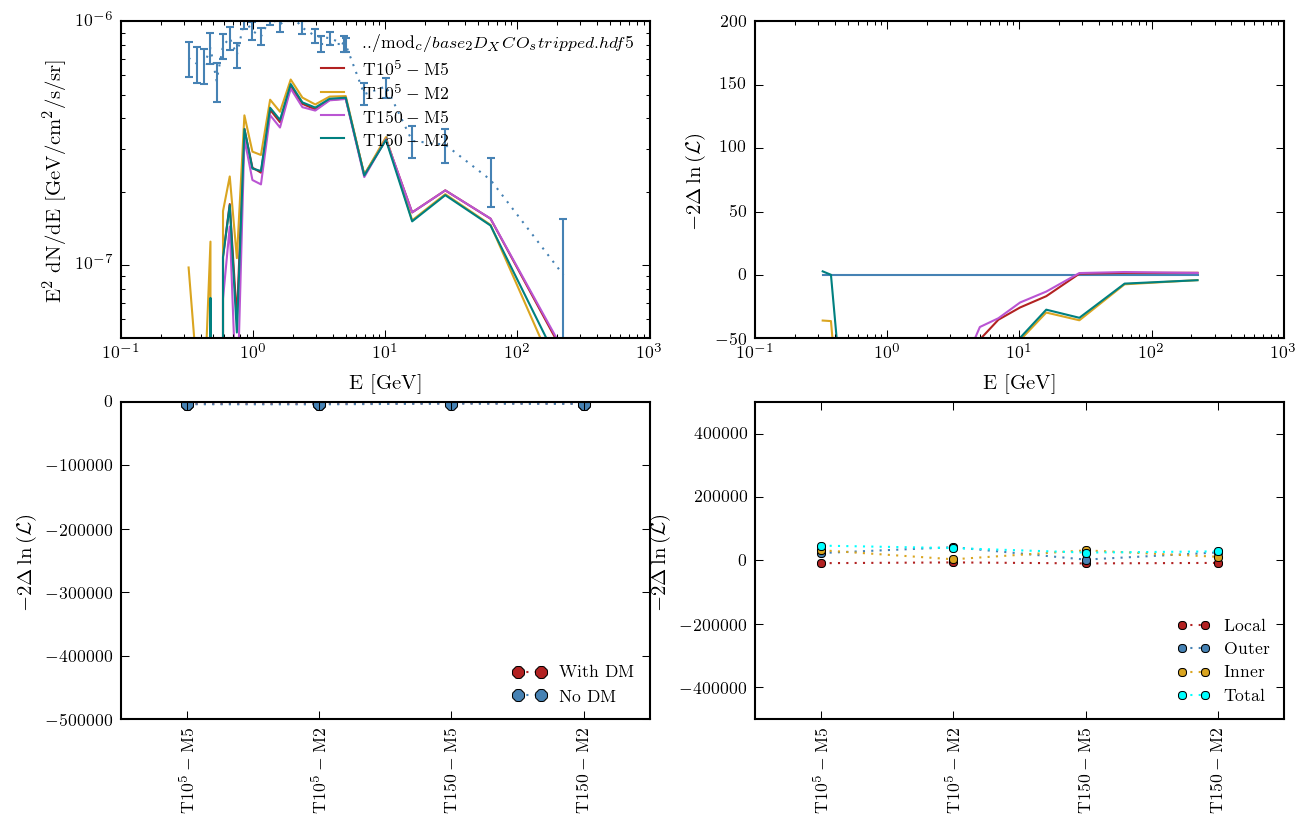

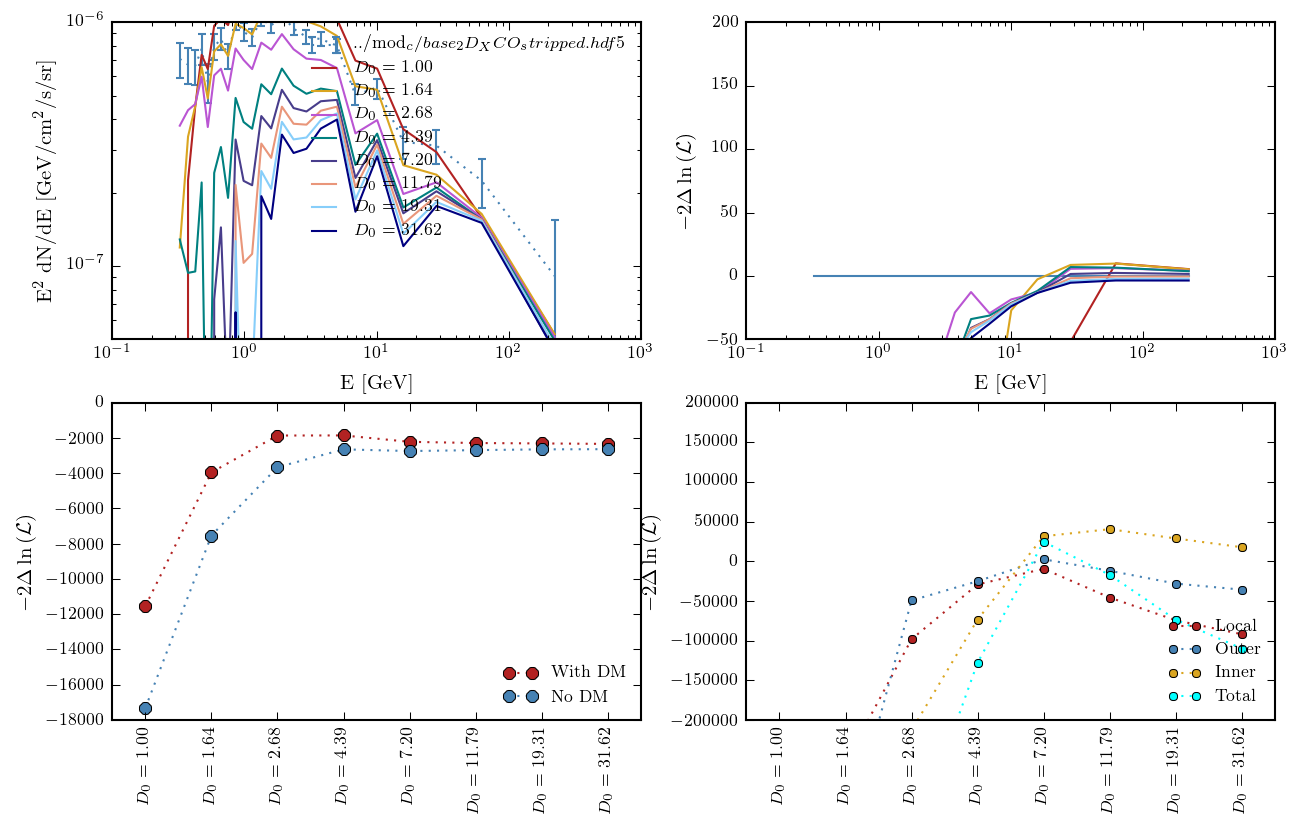

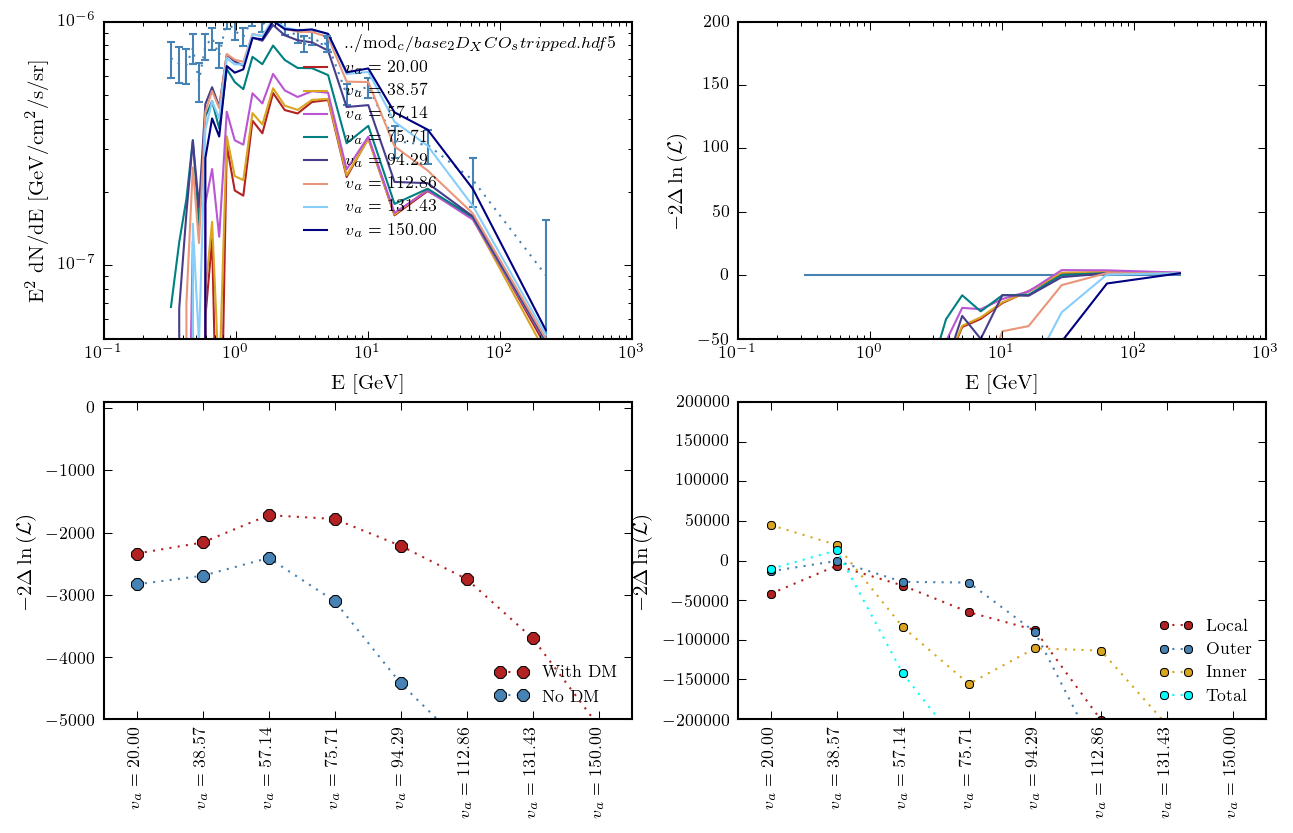

In [17]:

PlotSeries(start=0+51, stop=8+51, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.3f$'%i for i in np.linspace(0,.30,8)], mod=2, ylim_glob=(-2e5,2e5))
plt.show()
PlotSeries(start=8+51, stop=16+51, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.3f$'%i for i in np.linspace(0,.75,8)], mod=2, ylim_glob=(-2e5,2e5))
plt.show()
PlotSeries(start=16+51, stop=27+51, text='z_max', labels=[r'$z_max=%1.3f$'%i for i in np.linspace(2,7,11)], mod=2)
plt.show()
PlotSeries(start=27+51, stop=31+51, text='Primary CR Sources', labels=('Lorimer','SNR','OB','Yusifov'), ylim_glob=(-2e5,2e5))
plt.show()
PlotSeries(start=31+51, stop=35+51, text=r'$\rm T_S$ and Mag(B-V)', labels=(r'$\rm T10^5-M5$',r'$\rm T10^5-M2$',r'$\rm T150-M5$',r'$\rm T150-M2$'), ylim=(-5e5,0),ylim_glob=(-5e5,5e5))
plt.show()
PlotSeries(start=35+51, stop=43+51, text=r'$\rm D_0\ [10^{28} cm^{3}s^{-1}]$', labels=['$D_0=%2.2f' % D + '$' for D in np.logspace(28,29.5,8)/1e28], ylim_glob=(-2e5,2e5))
plt.show()
PlotSeries(start=43+51, stop=51+51, text=r'\noindent Alfven Velocity $v_A $\newline $\rm [km\ s^{-1}]$', labels=['$v_a=%2.2f' % v + '$' for v in np.linspace(20,150,8)], ylim=(-5000,100), ylim_glob=(-2e5,2e5))


# Galprop HI, PEB H2

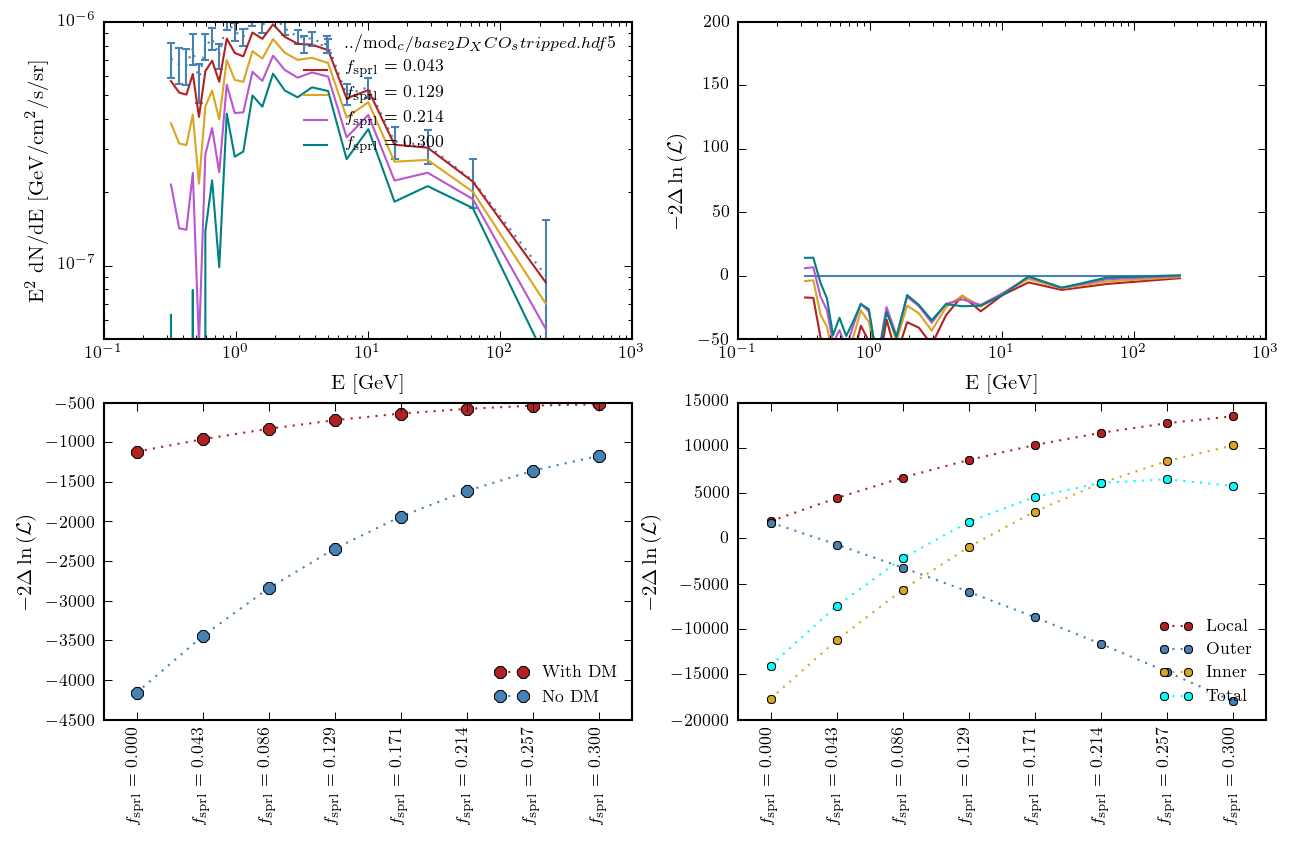

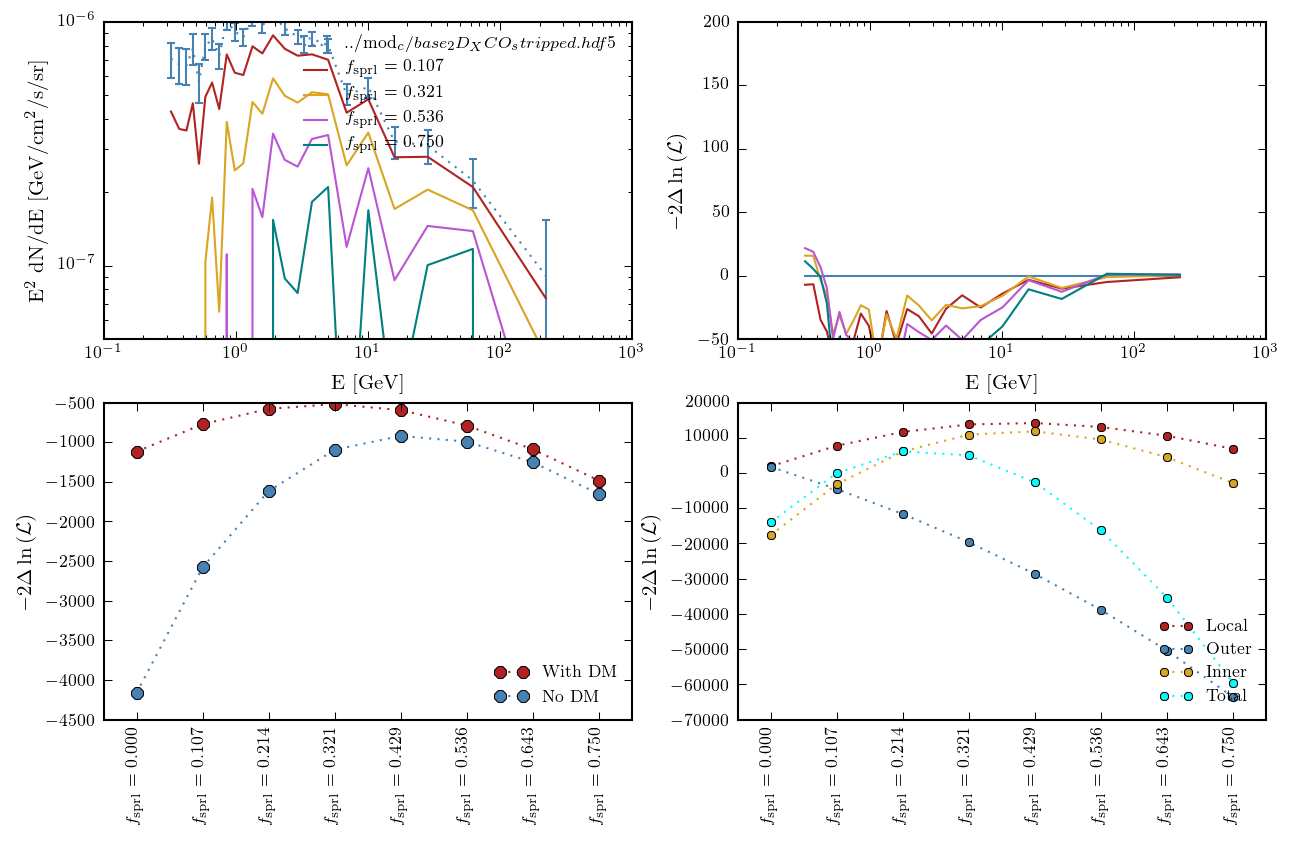

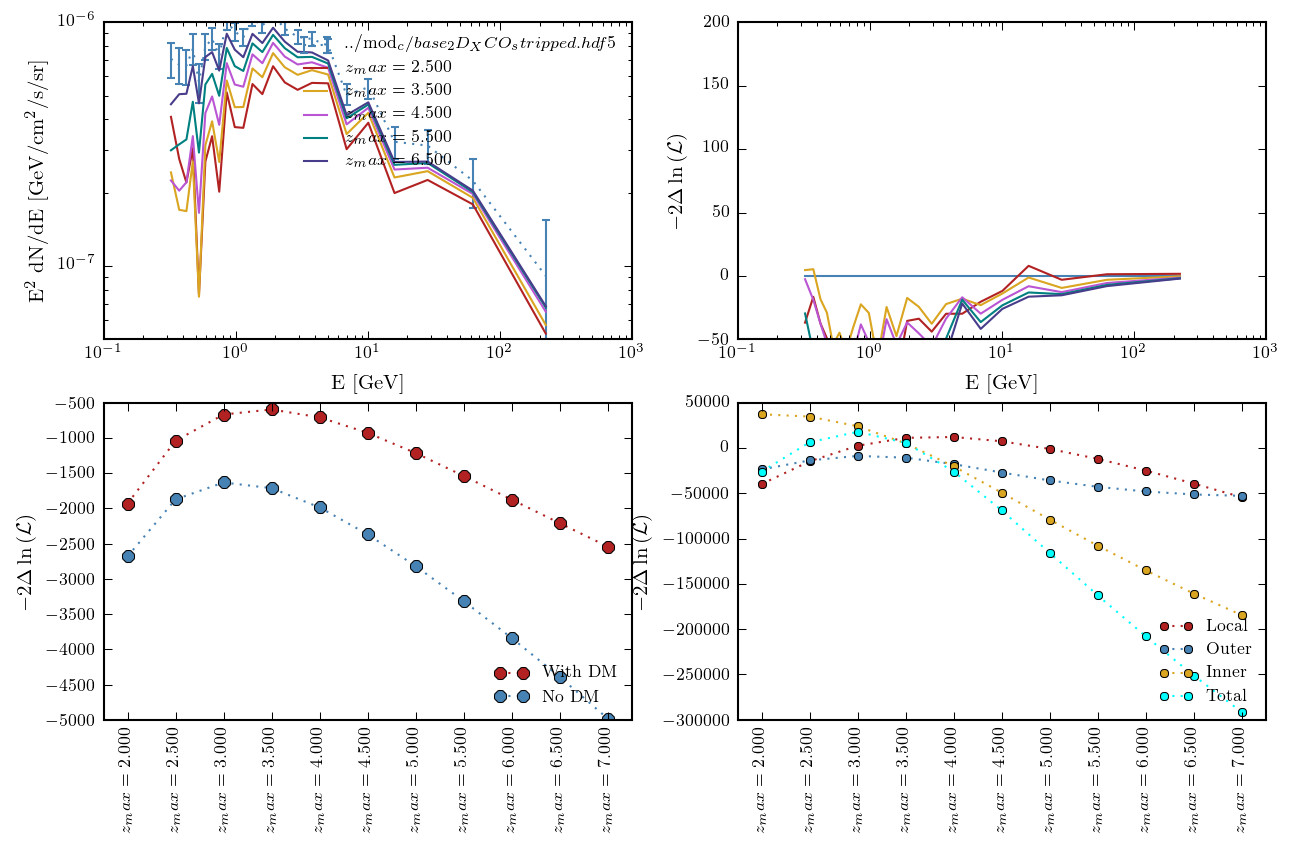

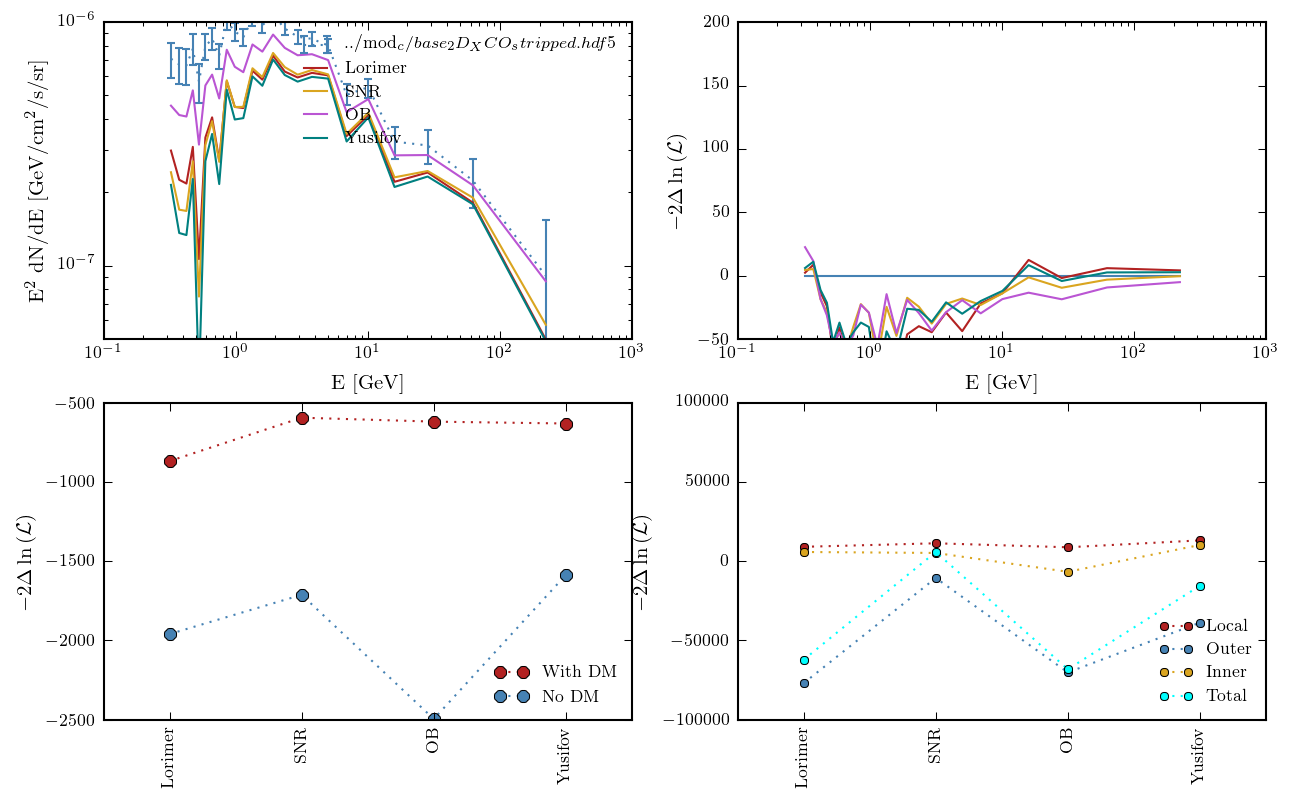

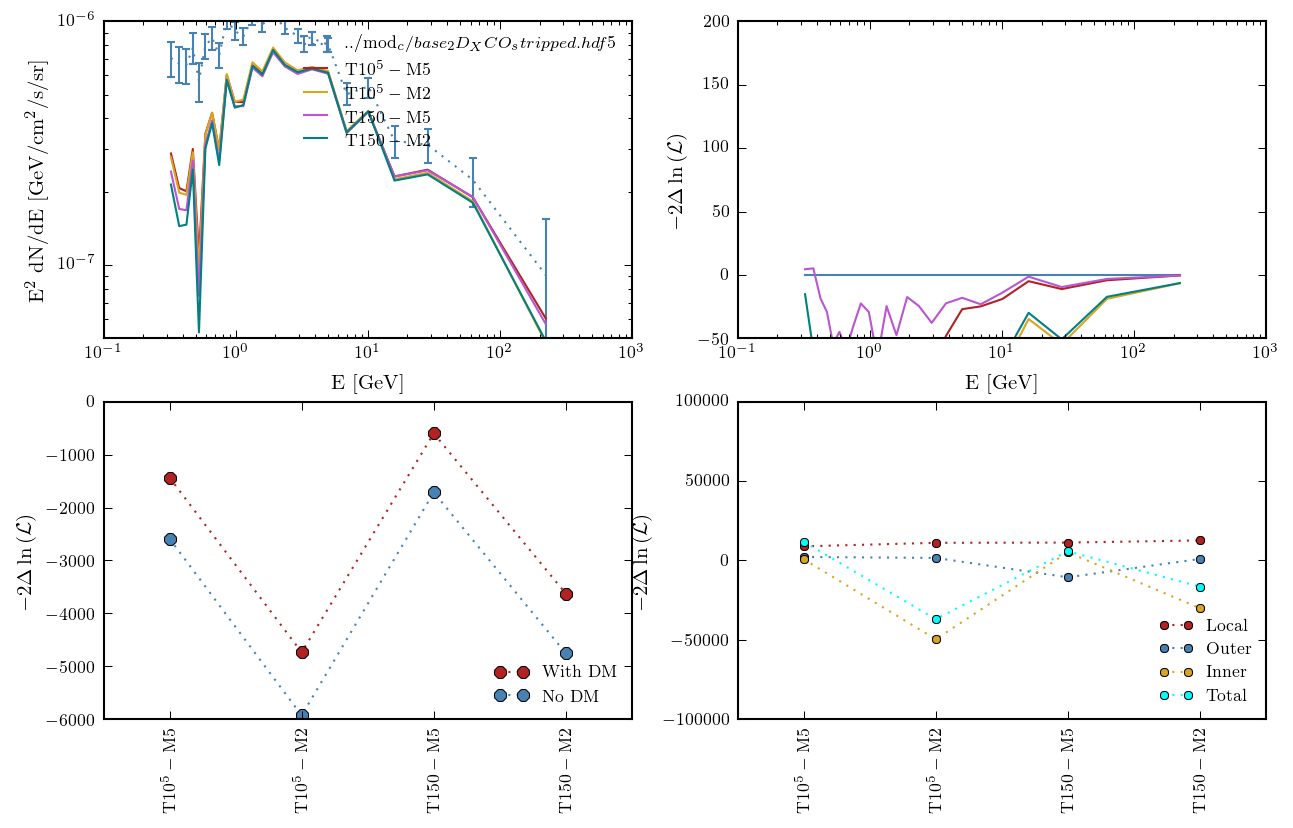

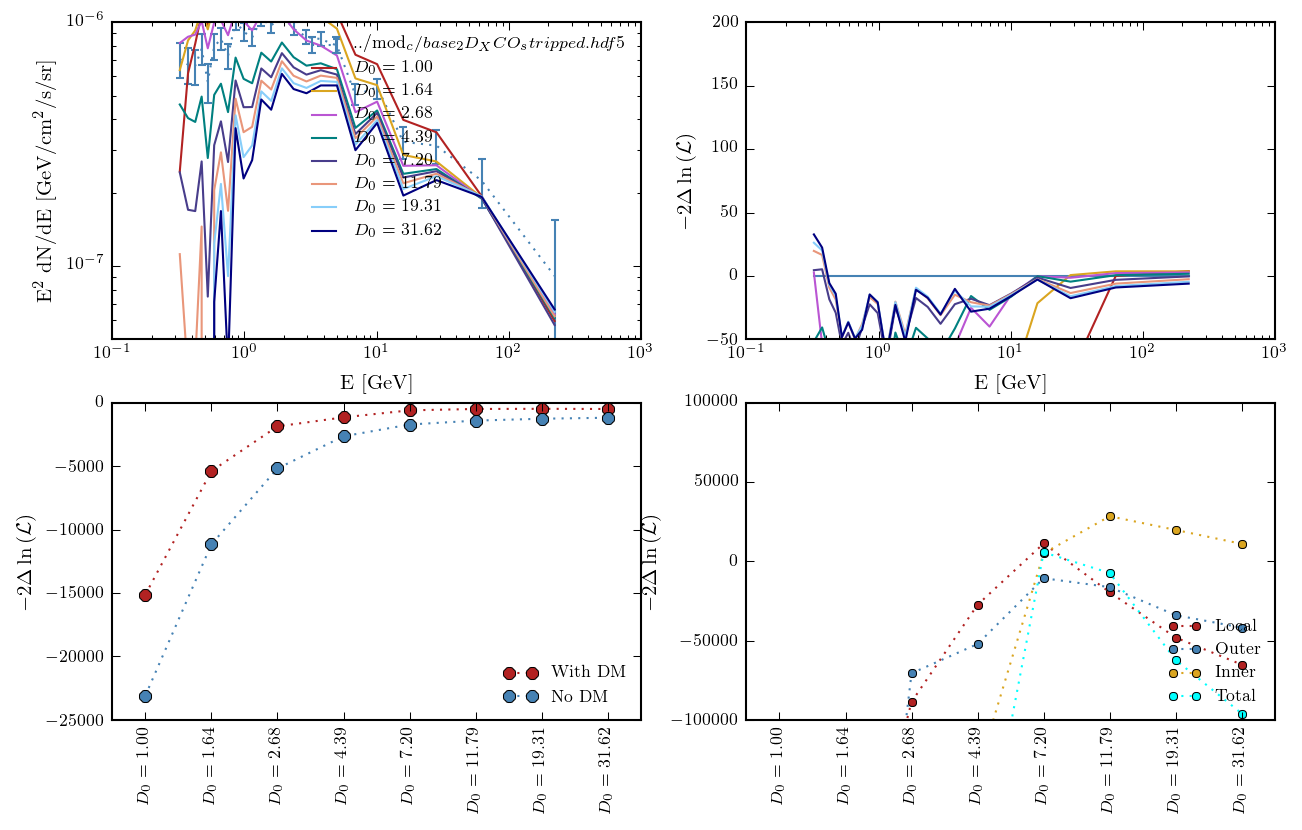

no results found for model  mod_h_149_XCO_stripped.hdf5


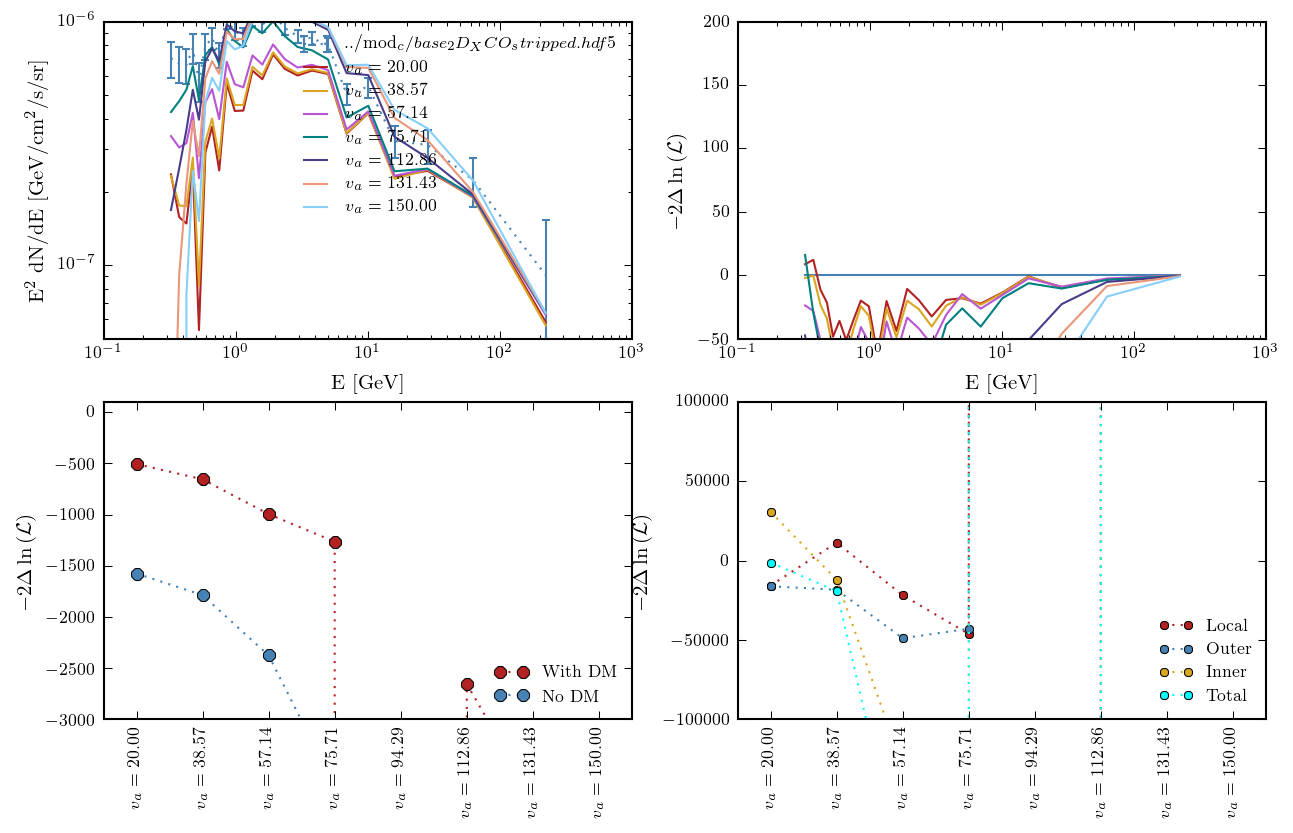

In [18]:

PlotSeries(start=0+102, stop=8+102, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.3f$'%i for i in np.linspace(0,.30,8)], mod=2)
plt.show()
PlotSeries(start=8+102, stop=16+102, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.3f$'%i for i in np.linspace(0,.75,8)], mod=2)
plt.show()
PlotSeries(start=16+102, stop=27+102, text='z_max', labels=[r'$z_max=%1.3f$'%i for i in np.linspace(2,7,11)], mod=2)
plt.show()
PlotSeries(start=27+102, stop=31+102, text='Primary CR Sources', labels=('Lorimer','SNR','OB','Yusifov'), ylim_glob=(-1e5,1e5))
plt.show()
PlotSeries(start=31+102, stop=35+102, text=r'$\rm T_S$ and Mag(B-V)', labels=(r'$\rm T10^5-M5$',r'$\rm T10^5-M2$',r'$\rm T150-M5$',r'$\rm T150-M2$'), ylim_glob=(-1e5,1e5))
plt.show()
PlotSeries(start=35+102, stop=43+102, text=r'$\rm D_0\ [10^{28} cm^{3}s^{-1}]$', labels=['$D_0=%2.2f' % D + '$' for D in np.logspace(28,29.5,8)/1e28], ylim_glob=(-1e5,1e5))
plt.show()
PlotSeries(start=43+102, stop=51+102, text=r'\noindent Alfven Velocity $v_A $\newline $\rm [km\ s^{-1}]$', labels=['$v_a=%2.2f' % v + '$' for v in np.linspace(20,150,8)], ylim=(-3000,100), ylim_glob=(-1e5,1e5))


## BOTH GALPROP

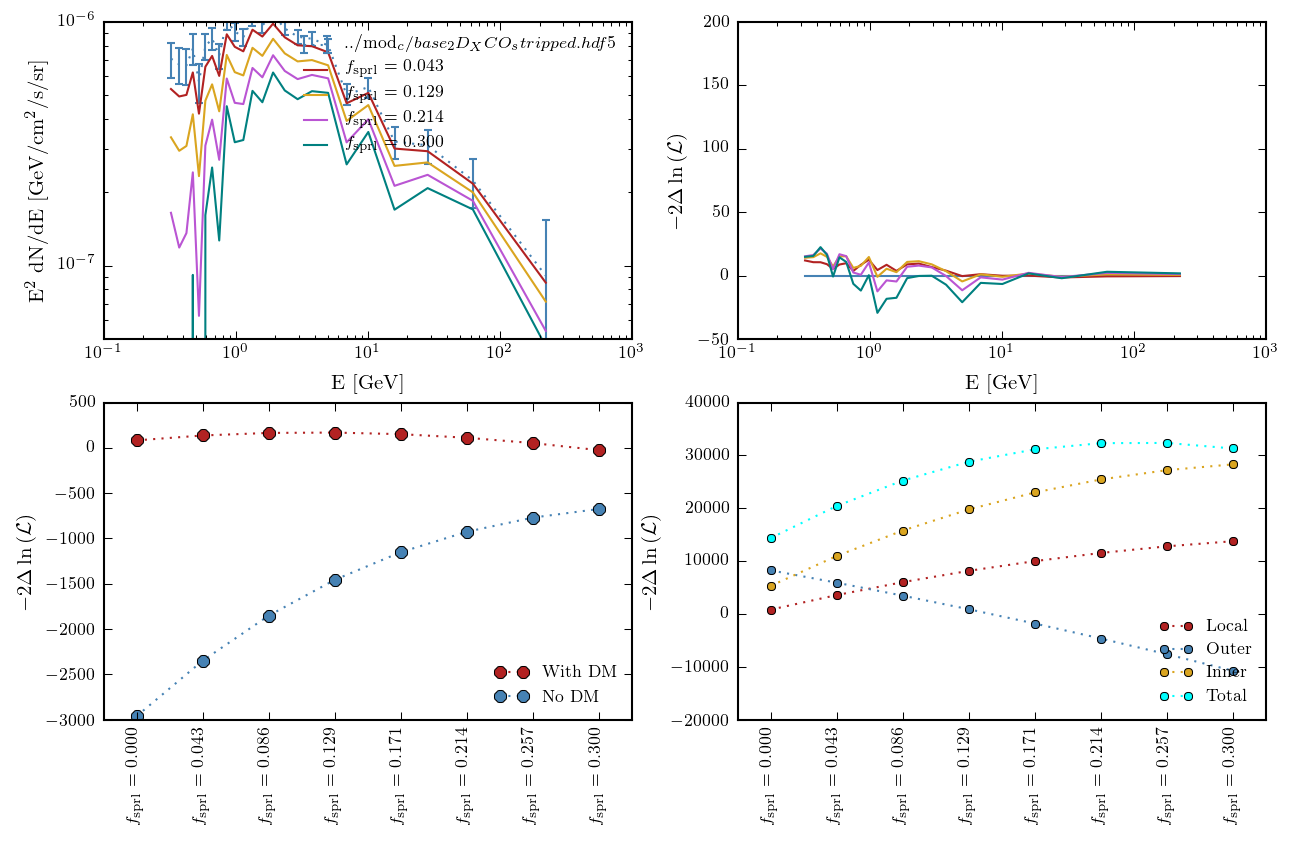

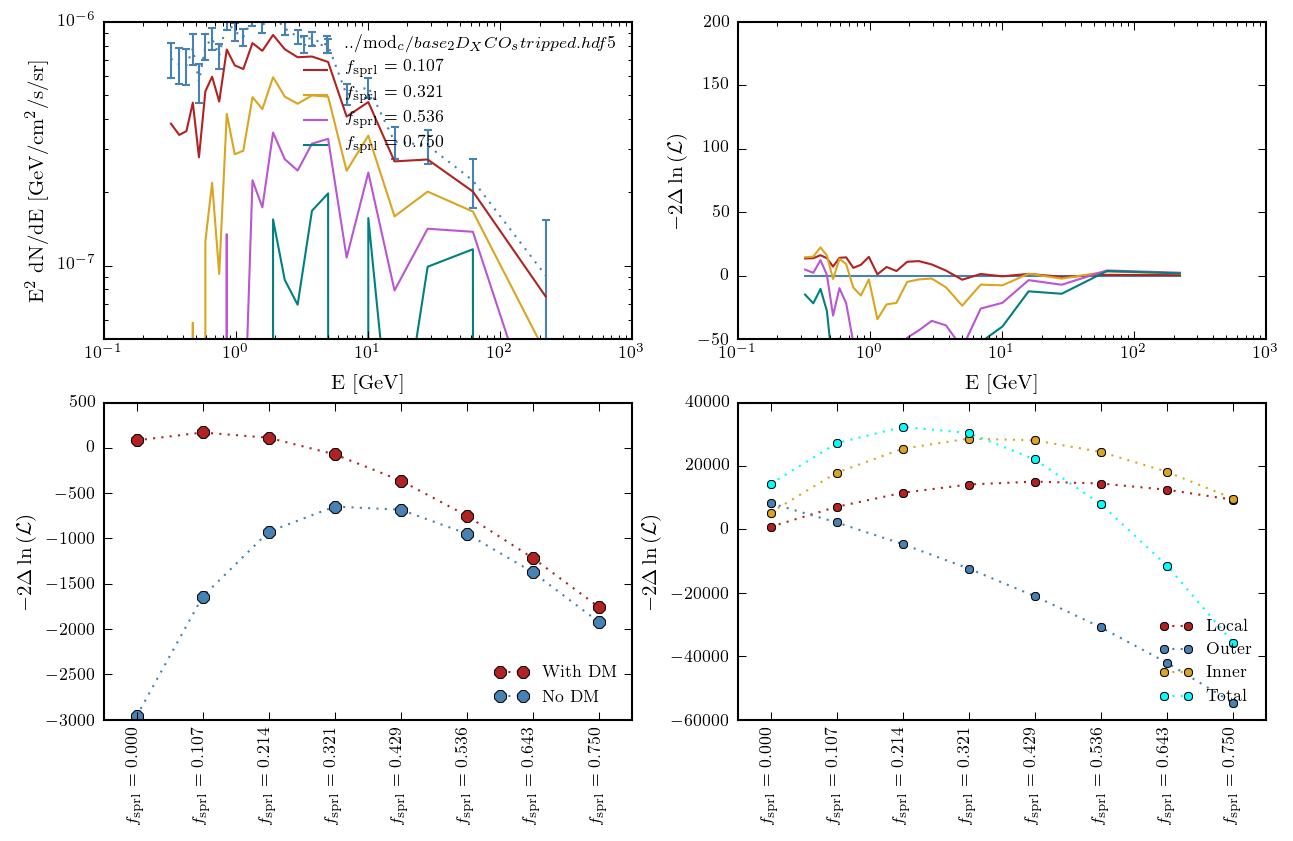

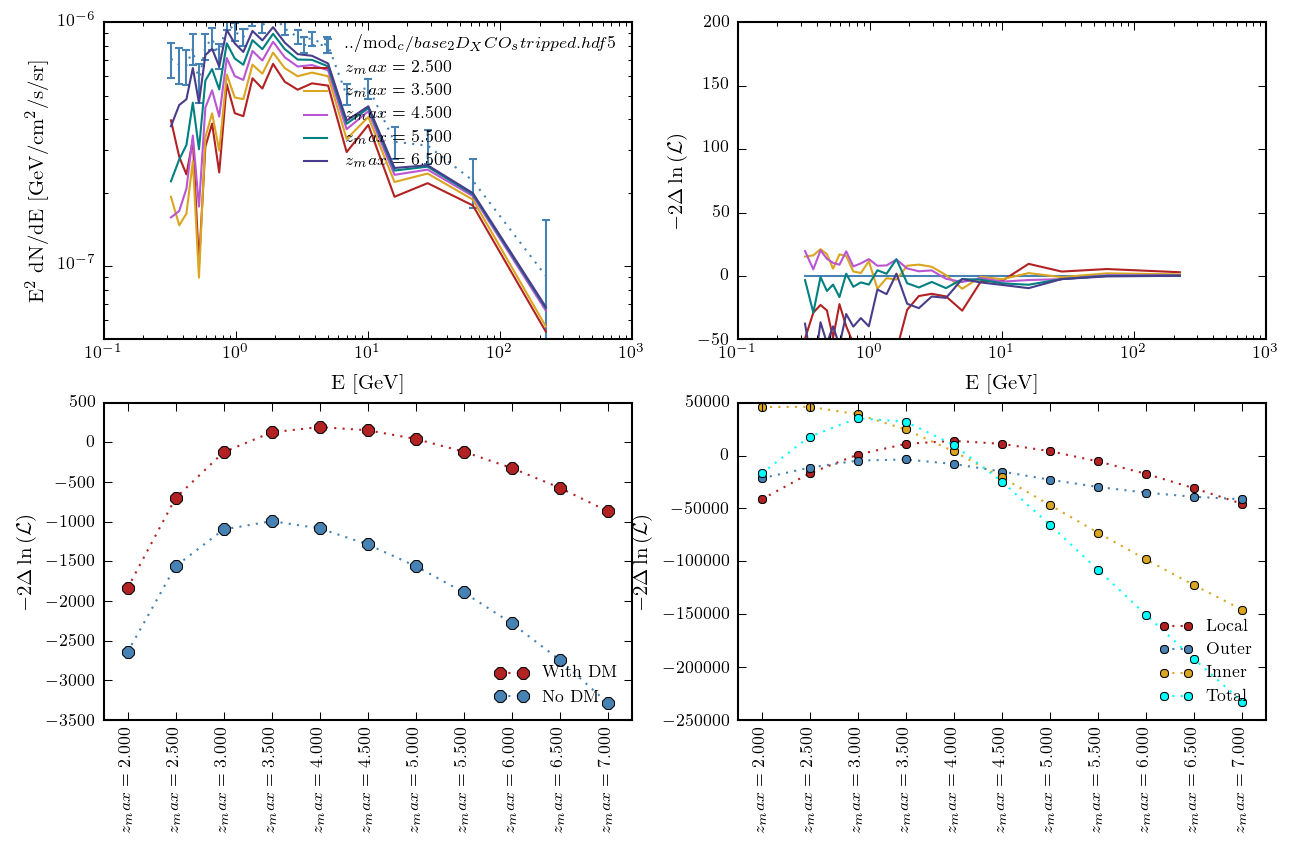

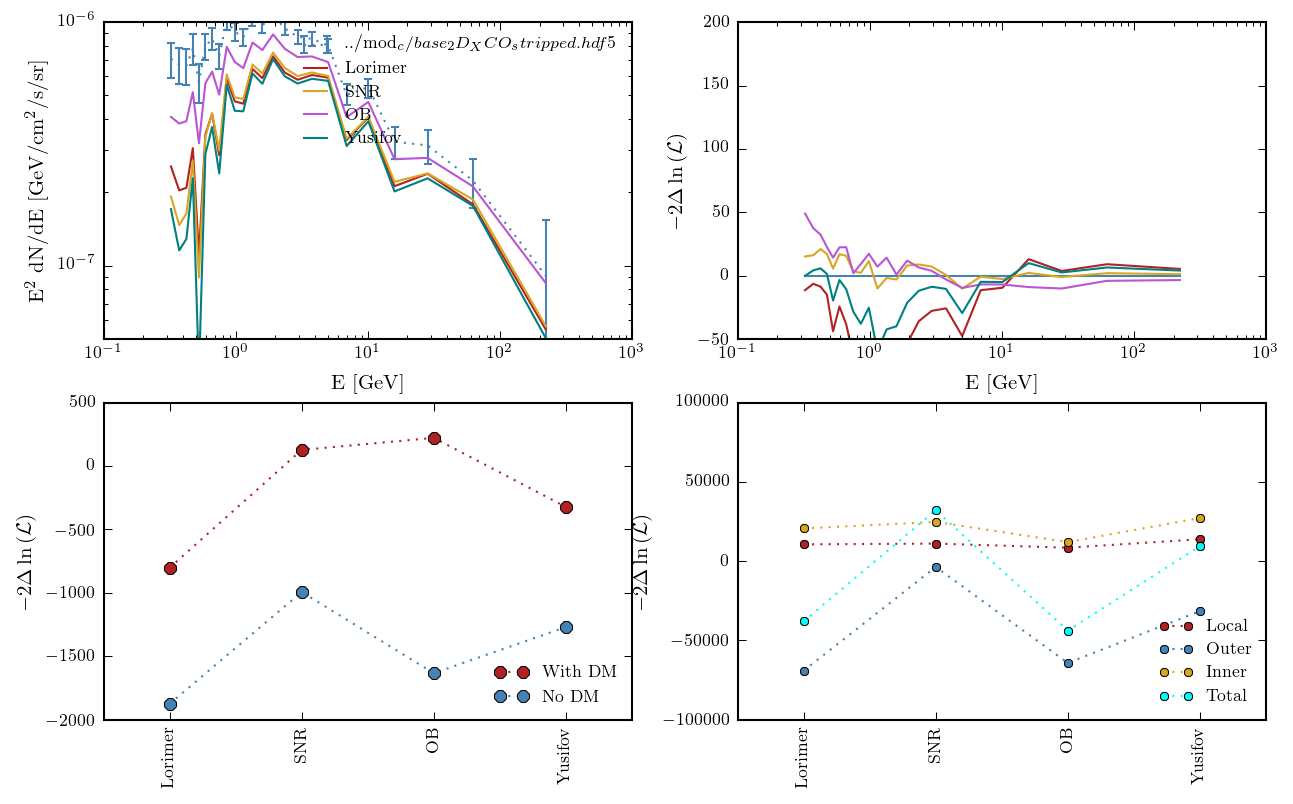

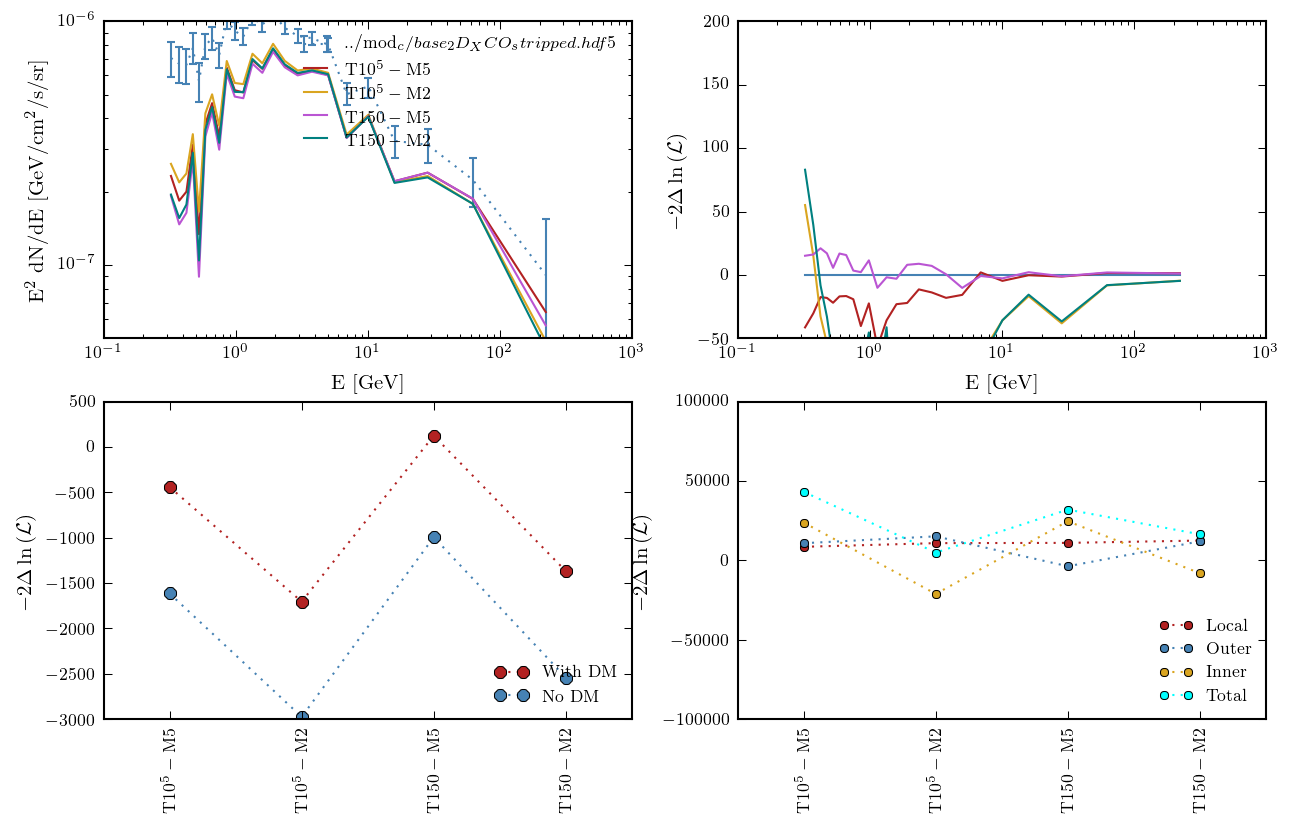

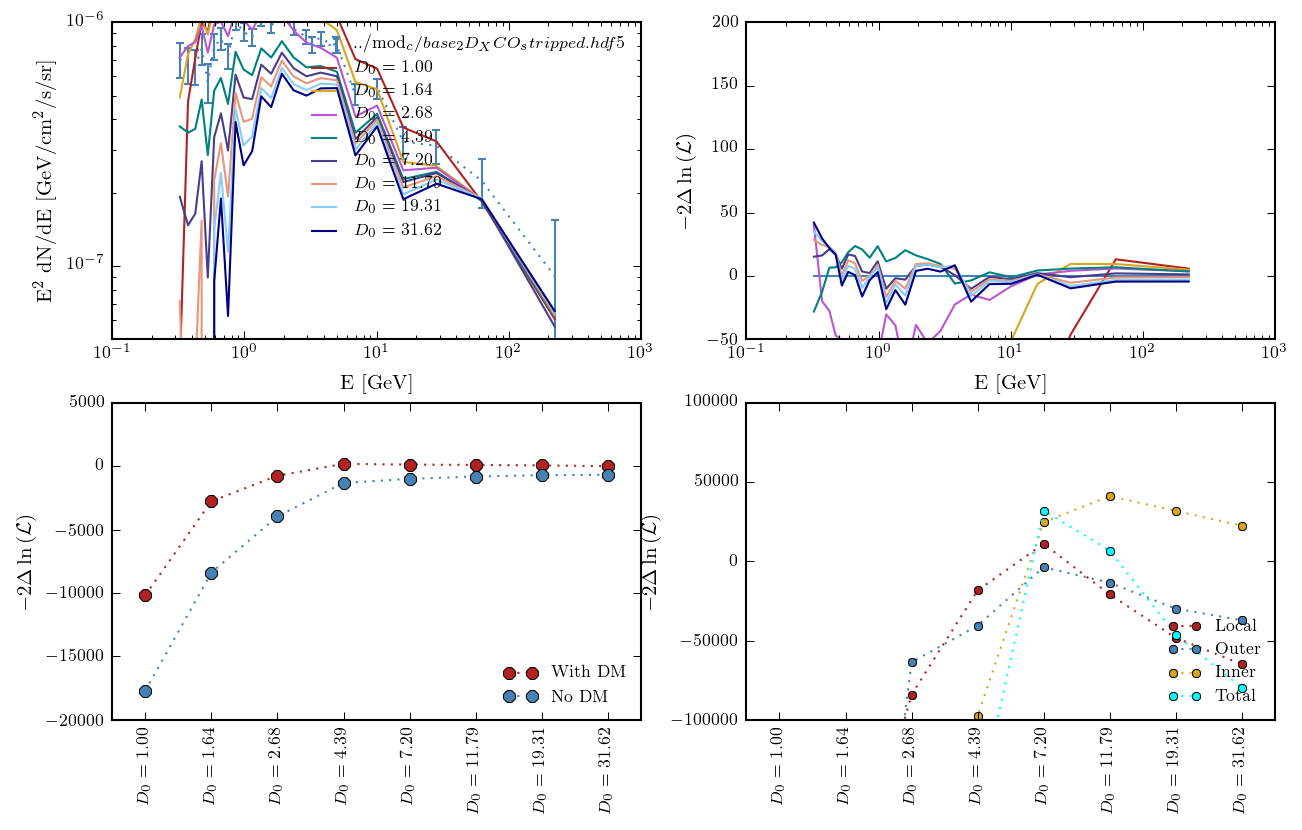

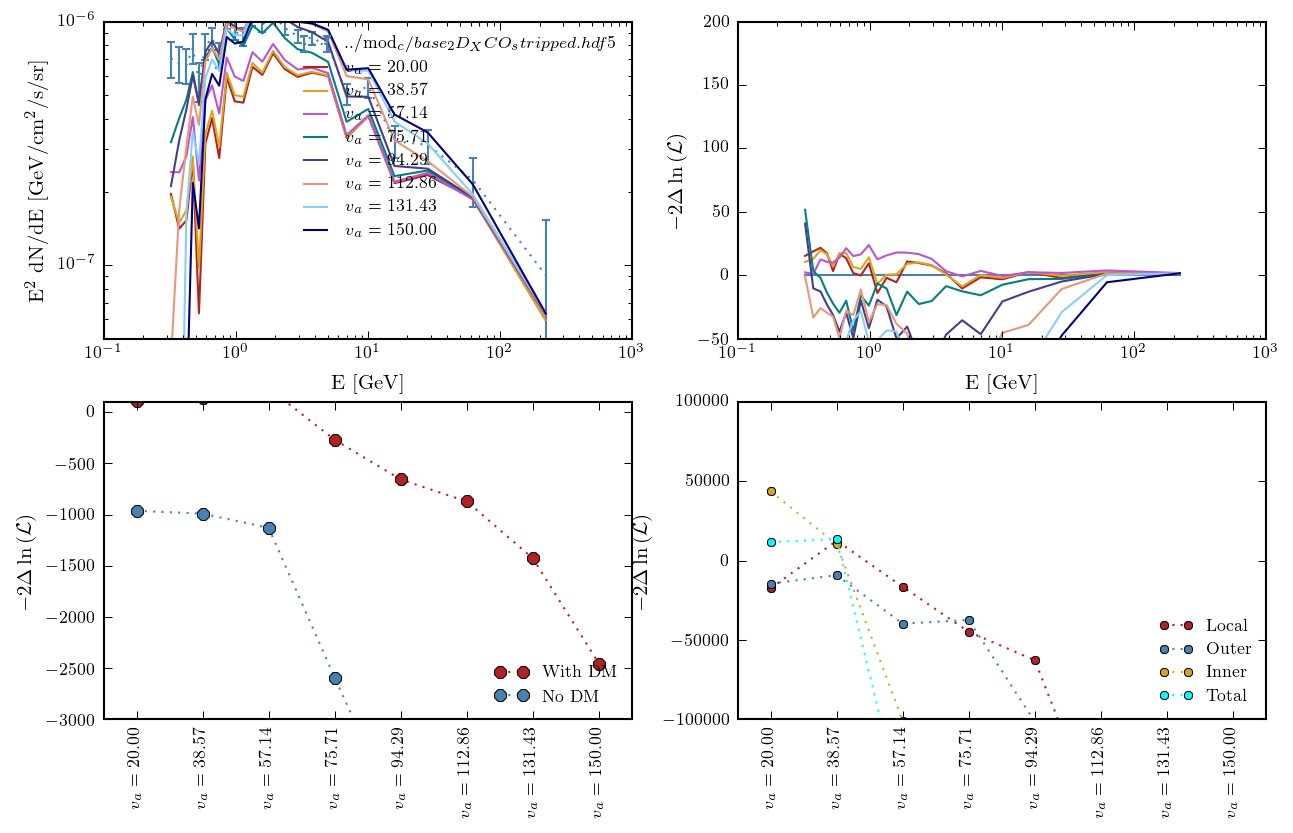

In [5]:
PlotSeries(start=0+153, stop=8+153, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.3f$'%i for i in np.linspace(0,.30,8)], mod=2)
plt.show()
PlotSeries(start=8+153, stop=16+153, text='Spiral Fraction', labels=[r'$f_{\rm sprl}=%1.3f$'%i for i in np.linspace(0,.75,8)], mod=2)
plt.show()
PlotSeries(start=16+153, stop=27+153, text='z_max', labels=[r'$z_max=%1.3f$'%i for i in np.linspace(2,7,11)], mod=2)
plt.show()
PlotSeries(start=27+153, stop=31+153, text='Primary CR Sources', labels=('Lorimer','SNR','OB','Yusifov'), ylim_glob=(-1e5,1e5))
plt.show()
PlotSeries(start=31+153, stop=35+153, text=r'$\rm T_S$ and Mag(B-V)', labels=(r'$\rm T10^5-M5$',r'$\rm T10^5-M2$',r'$\rm T150-M5$',r'$\rm T150-M2$'), ylim_glob=(-1e5,1e5))
plt.show()
PlotSeries(start=35+153, stop=43+153, text=r'$\rm D_0\ [10^{28} cm^{3}s^{-1}]$', labels=['$D_0=%2.2f' % D + '$' for D in np.logspace(28,29.5,8)/1e28], ylim_glob=(-1e5,1e5))
plt.show()
PlotSeries(start=43+153, stop=51+153, text=r'\noindent Alfven Velocity $v_A $\newline $\rm [km\ s^{-1}]$', labels=['$v_a=%2.2f' % v + '$' for v in np.linspace(20,150,8)], ylim=(-3000,100), ylim_glob=(-1e5,1e5))


In [42]:
#PlotSeries(start=33, stop=39, text=r'\noindent Convection $dv/dz$\newline $\rm [km\ s^{-1}\ kpc^{-1}]$', labels=['$dvdz=%2.2f' % v + '$' for v in np.linspace(0,500,6)])

In [43]:
#PlotSeries(start=47, stop=53, text=r'\noindent Magnetic Field $r_B$ $\rm [kpc]$', labels=['$r_b=%2.2f' % v + '$' for v in np.linspace(5,10,6)])

In [44]:
#PlotSeries(start=53, stop=59, text=r'\noindent Magnetic Field $z_B$ $\rm [kpc]$', labels=['$z_b=%2.2f' % v + '$' for v in np.linspace(1,4,6)])

In [45]:
#PlotSeries(start=69, stop=80, text=r'\noindent Source Spiral Fraction$', labels=[r'$f_{\rm sprl}=%2.2f' % v + '$' for v in np.linspace(0,.15,16)])

In [46]:
#PlotSeries(start=65, stop=73, text=r'\noindent ISRF OPT+FIR', labels=[r'$\rm isrf_{opt,fir}=%2.2f' % v + '$' for v in np.linspace(.5,3,8)])

log-like, TS: center_high_res_no_dm -1186161.14316 644.356812185
log-like, TS: center_high_res -1186693.36627 -1499.74386026
no results found for model  mod_h_149_XCO_stripped.hdf5
no results found for model  mod_h_204_XCO_stripped.hdf5


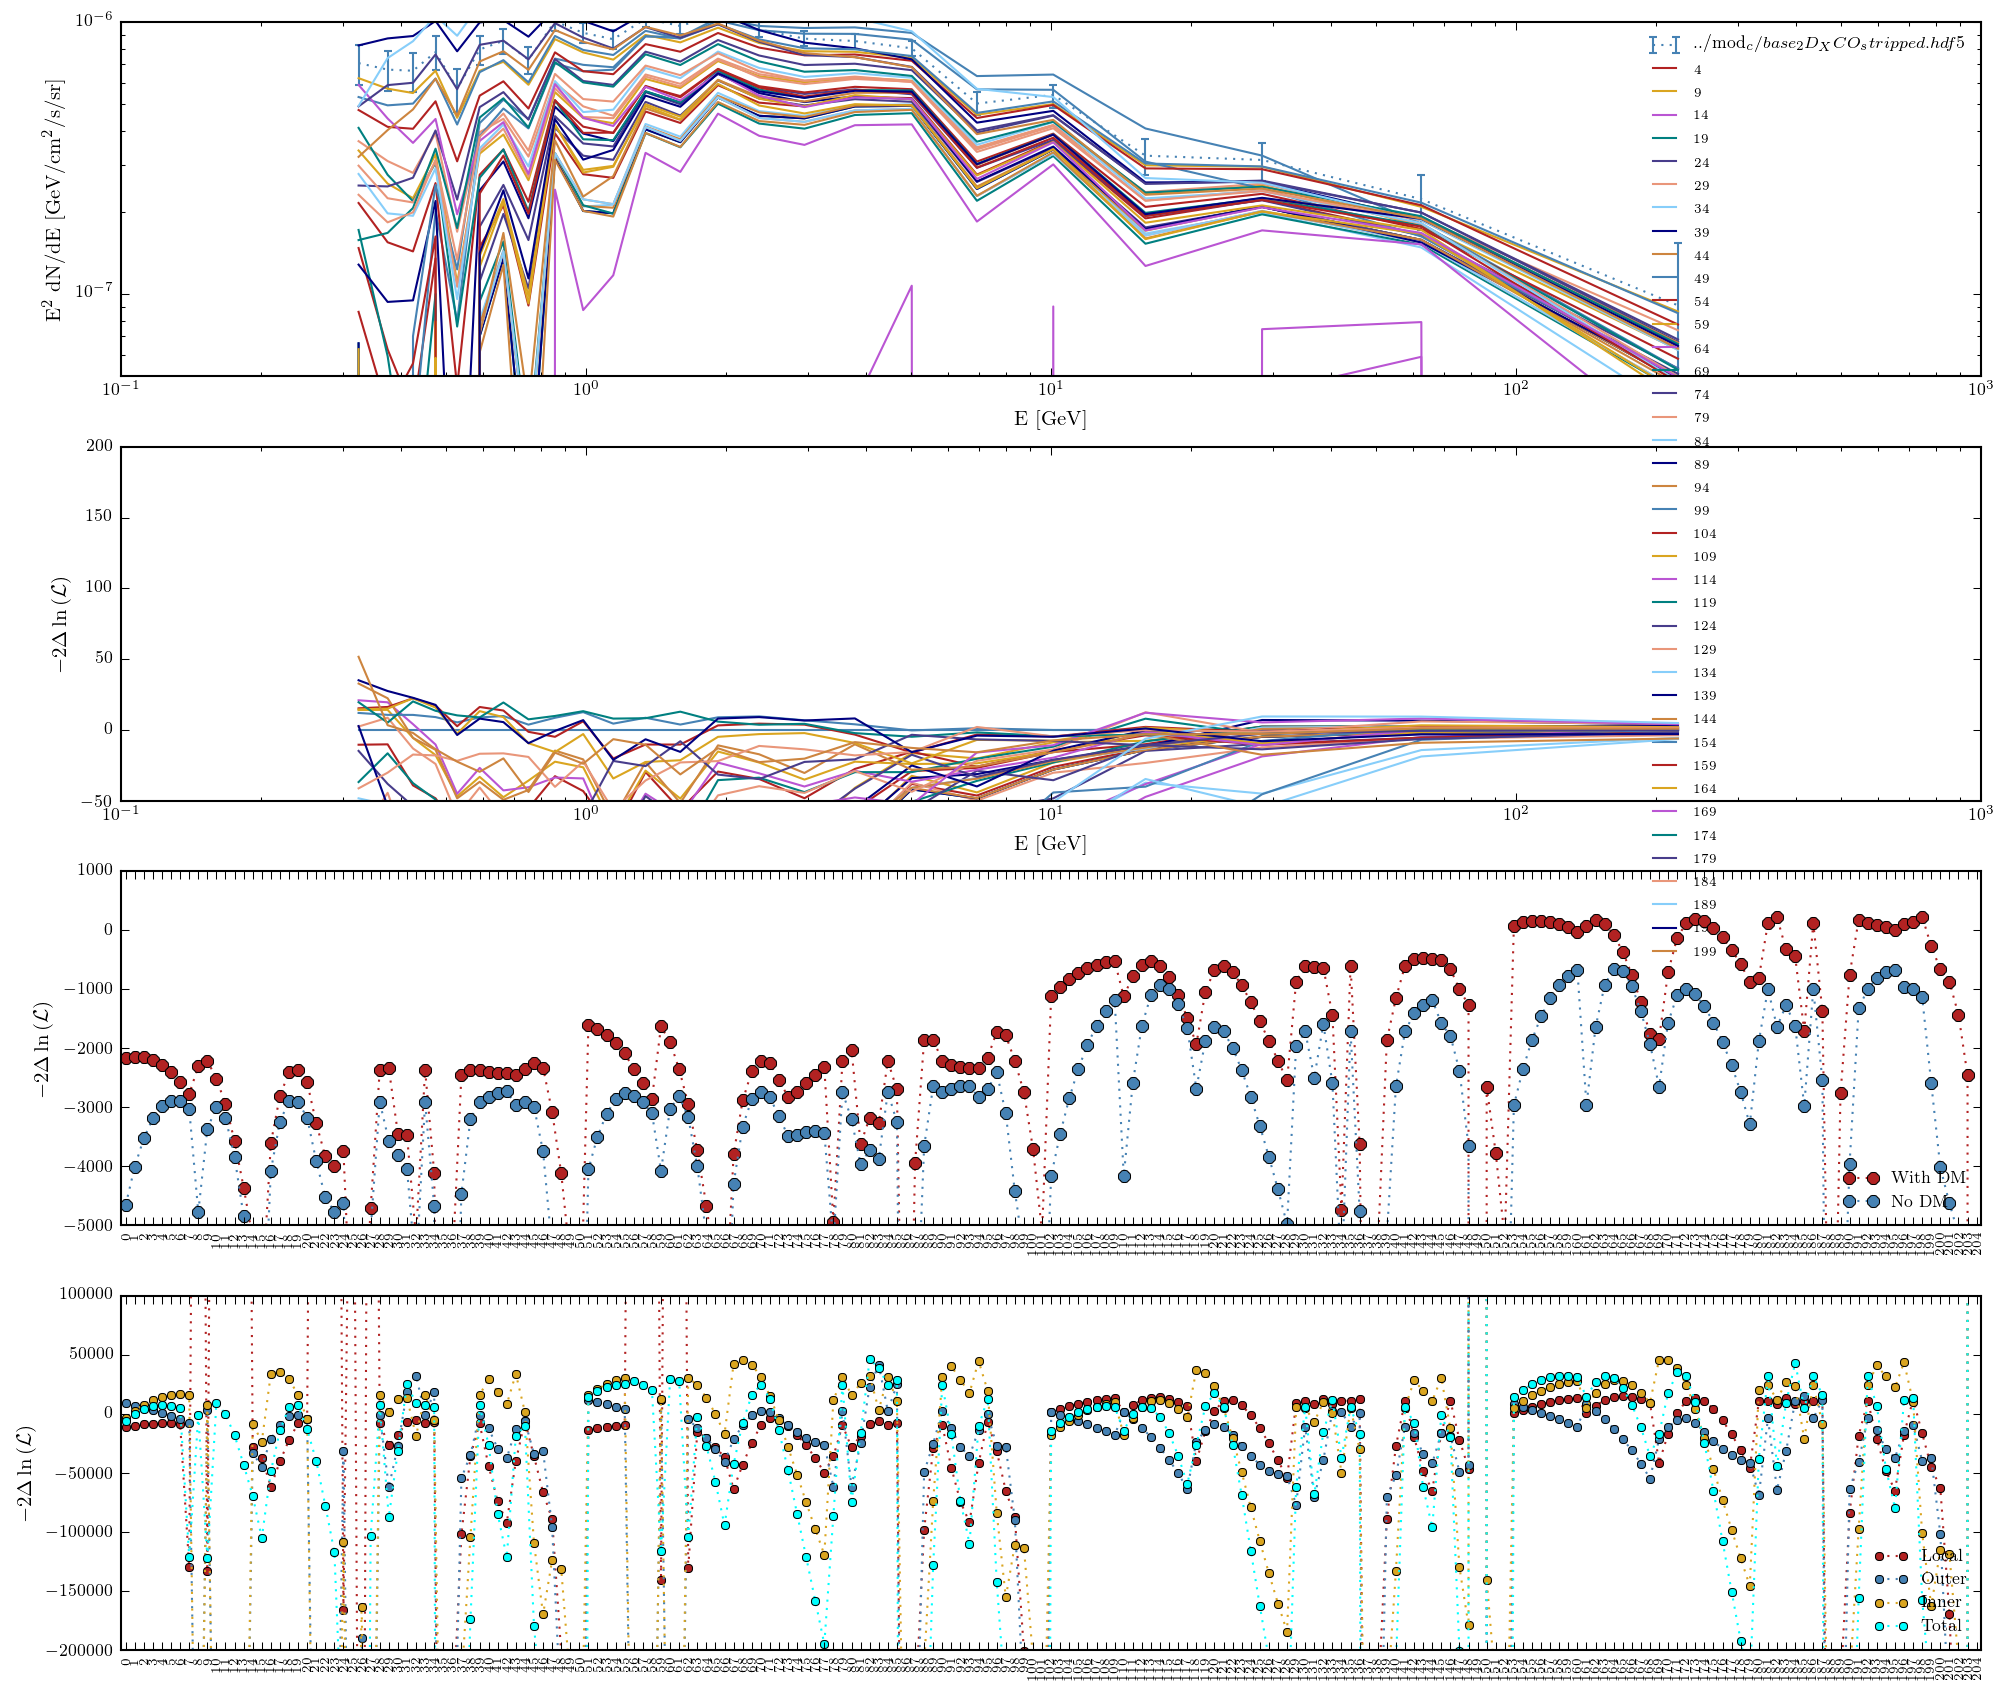

In [14]:
def PlotSeriesLong(start, stop, text,labels, ylim=None, mod=1, ylim_glob=None):
    plt.figure(figsize=(16,14))
    models = ['../mod_c/base_2D_XCO_stripped.hdf5'] + ['mod_h_%i_XCO_stripped.hdf5'%i for i in range(start, stop)]
    h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5')
    h_center_HR = h5py.File('../mod_c/mod_e_center_high_res.hdf5')
    
    print 'log-like, TS:', 'center_high_res_no_dm', np.sum(h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC_no_dm/'].attrs['loglike_total']-h_center_HR['/fit_results/GC_no_dm/'].attrs['loglike_total'])
    print 'log-like, TS:', 'center_high_res', np.sum(h_center_HR['/fit_results/GC/'].attrs['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-h_center_HR['/fit_results/GC/'].attrs['loglike_total'])
    
    fits = []
    ll, ll_no_dm = [], []
    llg1, llg2, llg3, llg4 = [],[],[],[]

    
    for i, model in enumerate(models):
            
        try:
            h_base = h5py.File('../mod_c/base_2D_XCO_stripped.hdf5', 'r')
            h = h5py.File('../mod_c/'+model)
            
            
            fit = h['/fit_results/GC'].attrs
            fit_no_dm = h['/fit_results/GC_no_dm'].attrs
            #print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
            ll.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
            ll_no_dm.append(2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
            
            fit_global = h['/fit_results/global'].attrs
            llg1.append(fit_global['localfval'])
            llg2.append(fit_global['outerfval'])
            llg3.append(fit_global['innerfval'])
            llg4.append(llg1[-1]+llg2[-1]+llg3[-1])
            
            #print fit.keys()
            E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']
            
            plt.subplot(411)

            if i==0:
                plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                             label=model,capthick=1, capsize=2, ls=':' )
            elif i%mod==0:
                plt.errorbar(E/1e3,(E**2*flux/1e3), 
                             label=labels[i-1],capthick=1, capsize=2, ls='-' )

            plt.subplot(412)
            
            #print h_base['/fit_results/GC/'].attrs.keys()
            if i%mod==0:
                TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
                plt.plot(E/1e3, TS)

        except:
            ll.append(-1e10)
            ll_no_dm.append(-1e10)
            llg1.append(-1e10)
            llg2.append(-1e10)
            llg3.append(-1e10)
            llg4.append(-1e10)
            print 'no results found for model ', model
    
    
    plt.subplot(413)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    
    plt.subplot(411)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.ylim(5e-8,1e-6)
    if 'spiral' in text:
        plt.yscale('symlog')
        plt.ylim(5e-7,2e-6)
    
    plt.subplot(412)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$')   
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.xscale('log')
    plt.ylim(-50,200)
            
    plt.subplot(413)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)
    
    plt.subplot(414)
    
    # ------------------------------------------------
    # Global fitting plot
    # ------------------------------------------------
    plt.plot(range(len(labels)), -2*(llg1[1:]-llg1[0]),marker='o',ls=':', markersize=4, color='firebrick', label='Local')
    plt.plot(range(len(labels)), -2*(llg2[1:]-llg2[0]),marker='o',ls=':', markersize=4,color='steelblue', label='Outer')
    plt.plot(range(len(labels)), -2*(llg3[1:]-llg3[0]),marker='o',ls=':', markersize=4,color='goldenrod', label='Inner')
    plt.plot(range(len(labels)), -2*(llg4[1:]-llg4[0]),marker='o',ls=':', markersize=4,color='cyan', label='Total')
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim_glob is not None:
        plt.ylim(ylim_glob)
    plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$') 
    plt.legend(frameon=False, fontsize=8, loc=4)

    
    

PlotSeriesLong(start=0, stop=205, text='all models', labels=['$_{'+str(i)+'}$' for i in range(0,205)], mod=5, ylim=(-5e3,1e3), ylim_glob=(-2e5,1e5))
plt.show()